In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import math
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices
import statistics as st
from sklearn.preprocessing import StandardScaler

In [3]:
dff=pd.read_csv("MiningProcess_Flotation_Plant_Database.csv", decimal=',')
dff.dtypes

date                             object
% Iron Feed                     float64
% Silica Feed                   float64
Starch Flow                     float64
Amina Flow                      float64
Ore Pulp Flow                   float64
Ore Pulp pH                     float64
Ore Pulp Density                float64
Flotation Column 01 Air Flow    float64
Flotation Column 02 Air Flow    float64
Flotation Column 03 Air Flow    float64
Flotation Column 04 Air Flow    float64
Flotation Column 05 Air Flow    float64
Flotation Column 06 Air Flow    float64
Flotation Column 07 Air Flow    float64
Flotation Column 01 Level       float64
Flotation Column 02 Level       float64
Flotation Column 03 Level       float64
Flotation Column 04 Level       float64
Flotation Column 05 Level       float64
Flotation Column 06 Level       float64
Flotation Column 07 Level       float64
% Iron Concentrate              float64
% Silica Concentrate            float64
dtype: object

### Análisis y limpieza de datos

In [3]:
dff.isna().sum().sort_values()

date                            0
Flotation Column 07 Level       0
Flotation Column 06 Level       0
Flotation Column 05 Level       0
Flotation Column 04 Level       0
Flotation Column 03 Level       0
Flotation Column 02 Level       0
Flotation Column 01 Level       0
Flotation Column 07 Air Flow    0
Flotation Column 06 Air Flow    0
Flotation Column 05 Air Flow    0
Flotation Column 04 Air Flow    0
Flotation Column 03 Air Flow    0
Flotation Column 02 Air Flow    0
Flotation Column 01 Air Flow    0
Ore Pulp Density                0
Ore Pulp pH                     0
Ore Pulp Flow                   0
Amina Flow                      0
Starch Flow                     0
% Silica Feed                   0
% Iron Feed                     0
% Iron Concentrate              0
% Silica Concentrate            0
dtype: int64

In [4]:
dff

date  % Iron Feed  % Silica Feed  Starch Flow  \
0       2017-03-10 01:00:00        55.20          16.98      3019.53   
1       2017-03-10 01:00:00        55.20          16.98      3024.41   
2       2017-03-10 01:00:00        55.20          16.98      3043.46   
3       2017-03-10 01:00:00        55.20          16.98      3047.36   
4       2017-03-10 01:00:00        55.20          16.98      3033.69   
...                     ...          ...            ...          ...   
737448  2017-09-09 23:00:00        49.75          23.20      2710.94   
737449  2017-09-09 23:00:00        49.75          23.20      2692.01   
737450  2017-09-09 23:00:00        49.75          23.20      2692.20   
737451  2017-09-09 23:00:00        49.75          23.20      1164.12   
737452  2017-09-09 23:00:00        49.75          23.20      1164.12   

        Amina Flow  Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
0          557.434        395.713     10.06640           1.74000   
1          563.965        397.383     10.06720           1.74000   
2          568.054        399.668     10.06800           1.74000   
3          568.665        397.939     10.06890           1.74000   
4          558.167        400.254     10.06970           1.74000   
...            ...            ...          ...               ...   
737448     441.052        386.570      9.62129           1.65365   
737449     473.436        384.939      9.62063           1.65352   
737450     500.488        383.496      9.61874           1.65338   
737451     491.548        384.976      9.61686           1.65324   
737452     468.019        384.801      9.61497           1.65310   

        Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  ...  \
0                            249.214                       253.235  ...   
1                            249.719                       250.532  ...   
2                            249.741                       247.874  ...   
3                            249.917                       254.487  ...   
4                            250.203                       252.136  ...   
...                              ...                           ...  ...   
737448                       302.344                       298.786  ...   
737449                       303.013                       301.879  ...   
737450                       303.662                       307.397  ...   
737451                       302.550                       301.959  ...   
737452                       300.355                       292.865  ...   

        Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0                            250.884                    457.396   
1                            248.994                    451.891   
2                            248.071                    451.240   
3                            251.147                    452.441   
4                            248.928                    452.441   
...                              ...                        ...   
737448                       313.695                    392.160   
737449                       236.700                    401.505   
737450                       225.879                    408.899   
737451                       308.115                    405.107   
737452                       308.115                    413.754   

        Flotation Column 02 Level  Flotation Column 03 Level  \
0                         432.962                    424.954   
1                         429.560                    432.939   
2                         468.927                    434.610   
3                         458.165                    442.865   
4                         452.900                    450.523   
...                           ...                        ...   
737448                    430.702                    872.008   
737449                    404.616                    864.409   
737450                    399.316                    867.59

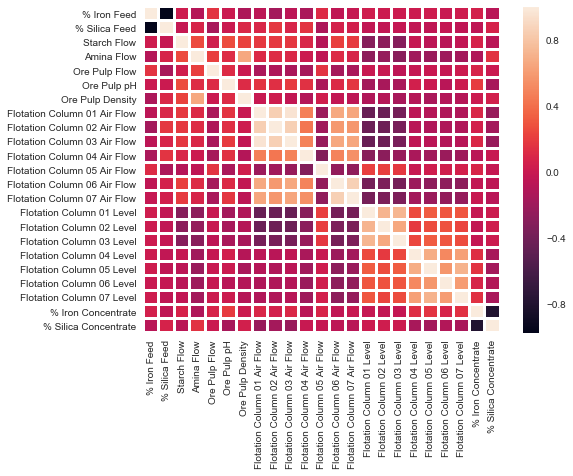

In [5]:
sns.set(rc={"figure.figsize":(8,6)})
sns.heatmap(dff.corr(),linewidths=2)

In [6]:
dff.describe()

% Iron Feed  % Silica Feed    Starch Flow     Amina Flow  \
count  737453.000000  737453.000000  737453.000000  737453.000000   
mean       56.294739      14.651716    2869.140569     488.144697   
std         5.157744       6.807439    1215.203734      91.230534   
min        42.740000       1.310000       0.002026     241.669000   
25%        52.670000       8.940000    2076.320000     431.796000   
50%        56.080000      13.850000    3018.430000     504.393000   
75%        59.720000      19.600000    3727.730000     553.257000   
max        65.780000      33.400000    6300.230000     739.538000   

       Ore Pulp Flow    Ore Pulp pH  Ore Pulp Density  \
count  737453.000000  737453.000000     737453.000000   
mean      397.578372       9.767639          1.680380   
std         9.699785       0.387007          0.069249   
min       376.249000       8.753340          1.519820   
25%       394.264000       9.527360          1.647310   
50%       399.249000       9.798100          1.697600   
75%       402.968000      10.038000          1.728330   
max       418.641000      10.808100          1.853250   

       Flotation Column 01 Air Flow  Flotation Column 02 Air Flow  \
count                 737453.000000                 737453.000000   
mean                     280.151856                    277.159965   
std                       29.621288                     30.149357   
min                      175.510000                    175.156000   
25%                      250.281000                    250.457000   
50%                      299.344000                    296.223000   
75%                      300.149000                    300.690000   
max                      373.871000                    375.992000   

       Flotation Column 03 Air Flow  ...  Flotation Column 07 Air Flow  \
count                 737453.000000  ...                 737453.000000   
mean                     281.082397  ...                    290.754856   
std                       28.558268  ...                     28.670105   
min                      176.469000  ...                    185.962000   
25%                      250.855000  ...                    256.302000   
50%                      298.696000  ...                    299.011000   
75%                      300.382000  ...                    301.904000   
max                      364.346000  ...                    371.593000   

       Flotation Column 01 Level  Flotation Column 02 Level  \
count              737453.000000              737453.000000   
mean                  520.244823                 522.649555   
std                   131.014924                 128.165050   
min                   149.218000                 210.752000   
25%                   416.978000                 441.883000   
50%                   491.878000                 495.956000   
75%                   594.114000                 595.464000   
max                   862.274000                 828.919000   

       Flotation Column 03 Level  Flotation Column 04 Level  \
count              737453.000000              737453.000000   
mean                  531.352662                 420.320973   
std                   150.842164                  91.794432   
min                   126.255000                 162.201000   
25%                   411.325000                 356.679000   
50%                   494.318000                 411.974000   
75%                   601.249000                 485.549000   
max                   886.822000                 680.359000   

       Flotation Column 05 Level  Flotation Column 06 Level  \
count              737453.000000              737453.000000   
mean                  425.251706                 429.941018   
std                    84.535822                  89.862225   
min                   166.991000                 155.841000   
25%                   357.653000                 358.497000   
50%                   408.773000                 424.664575   
75%    

In [7]:
dff["fecha"]=pd.to_datetime(dff["date"])
dff["month"]=dff["fecha"].dt.month
dff["day"]=dff["fecha"].dt.day
dff["hour"]=dff["fecha"].dt.hour
df=dff.groupby(by=["hour","month"],as_index=False).mean()

In [8]:
df1=df.drop(['day'],axis=1)
df1

hour  month  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0       0      3    58.912500      10.661250  3069.996384  455.836066   
1       0      4    55.686870      14.845910  1991.609124  506.892739   
2       0      5    59.912903      11.206452  3155.407620  457.737956   
3       0      6    58.888333      11.717000  3105.213209  488.278946   
4       0      7    54.349032      16.023226  3563.570182  506.966117   
..    ...    ...          ...            ...          ...         ...   
163    23      5    60.230000      10.819355  3007.571705  453.237669   
164    23      6    58.399333      12.370667  3301.178726  503.163649   
165    23      7    54.610323      15.537097  3490.564528  493.169936   
166    23      8    53.324516      18.180645  3049.135341  456.287597   
167    23      9    54.606667      15.877778  3208.454937  511.132841   

     Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  \
0       401.728846     9.619755          1.671383   
1       400.603400     9.605476          1.724795   
2       401.553241     9.845342          1.649995   
3       400.273662     9.780639          1.666807   
4       401.389191    10.087600          1.695065   
..             ...          ...               ...   
163     401.846796     9.827131          1.643248   
164     400.796886     9.820686          1.665270   
165     399.511193    10.113365          1.683739   
166     386.800512     9.585122          1.674319   
167     392.026647     9.521646          1.694394   

     Flotation Column 01 Air Flow  ...  Flotation Column 07 Air Flow  \
0                      237.440485  ...                    250.075088   
1                      255.588522  ...                    261.732039   
2                      275.768953  ...                    299.974900   
3                      296.576006  ...                    296.630402   
4                      284.116854  ...                    293.335683   
..                            ...  ...                           ...   
163                    275.849944  ...                    299.958400   
164                    296.675832  ...                    296.540736   
165                    285.570375  ...                    295.115602   
166                    299.929840  ...                    308.765044   
167                    299.887146  ...                    308.293838   

     Flotation Column 01 Level  Flotation Column 02 Level  \
0                   589.677299                 618.298030   
1                   628.723440                 631.140540   
2                   484.877298                 481.670291   
3                   461.197766                 457.284193   
4                   479.099933                 492.025204   
..                         ...                        ...   
163                 490.105594                 488.910625   
164                 471.351419                 470.996379   
165                 471.094683                 483.098785   
166                 493.330783                 486.400675   
167                 443.004430                 494.926291   

     Flotation Column 03 Level  Flotation Column 04 Level  \
0                   585.981099                 477.929939   
1                   644.670249                 408.363224   
2                   515.712302                 366.777923   
3                   470.999979                 441.494783   
4                   492.030949                 443.193250   
..                         ...                        ...   
163                 496.386205                 379.291286   
164                 469.633516                 437.789020   
165                 475.619637                 439.644655   
166                 526.624149                 424.257931   
167                 522.003032                 373.572636   

     Flotation Column 05 Level  Flotation Column 06 Level  \
0                   484.697804                 496.155169   
1                   414.663945        

In [9]:
df1.corr()

hour     month  % Iron Feed  % Silica Feed  \
hour                          1.000000  0.000000     0.040985      -0.085072   
month                         0.000000  1.000000    -0.653159       0.698050   
% Iron Feed                   0.040985 -0.653159     1.000000      -0.982300   
% Silica Feed                -0.085072  0.698050    -0.982300       1.000000   
Starch Flow                  -0.009285  0.390924     0.094191      -0.112166   
Amina Flow                   -0.032629  0.409884    -0.348510       0.317260   
Ore Pulp Flow                -0.051431 -0.678481     0.619107      -0.653690   
Ore Pulp pH                   0.018478 -0.071884     0.182798      -0.183348   
Ore Pulp Density             -0.050379 -0.298808    -0.208169       0.110031   
Flotation Column 01 Air Flow -0.018196  0.857977    -0.370488       0.472681   
Flotation Column 02 Air Flow -0.023981  0.910738    -0.455017       0.545633   
Flotation Column 03 Air Flow -0.019937  0.876132    -0.395284       0.492273   
Flotation Column 04 Air Flow  0.021369  0.610705    -0.264967       0.395385   
Flotation Column 05 Air Flow -0.011952 -0.869091     0.486438      -0.582659   
Flotation Column 06 Air Flow -0.010907  0.914958    -0.346901       0.431551   
Flotation Column 07 Air Flow -0.013245  0.838077    -0.253293       0.362585   
Flotation Column 01 Level     0.093725 -0.722319     0.047817      -0.123576   
Flotation Column 02 Level     0.072451 -0.530572    -0.146949       0.056516   
Flotation Column 03 Level     0.114878 -0.695892     0.032099      -0.091570   
Flotation Column 04 Level     0.079195 -0.416162     0.173496      -0.262887   
Flotation Column 05 Level     0.092894 -0.459122     0.126994      -0.234475   
Flotation Column 06 Level     0.032264 -0.393986     0.052793      -0.141170   
Flotation Column 07 Level     0.080177 -0.539793     0.186193      -0.283792   
% Iron Concentrate            0.012045 -0.538456     0.419308      -0.468577   
% Silica Concentrate         -0.079376 -0.150168     0.011985      -0.029996   

                              Starch Flow  Amina Flow  Ore Pulp Flow  \
hour                            -0.009285   -0.032629      -0.051431   
month                            0.390924    0.409884      -0.678481   
% Iron Feed                      0.094191   -0.348510       0.619107   
% Silica Feed                   -0.112166    0.317260      -0.653690   
Starch Flow                      1.000000    0.188924      -0.115715   
Amina Flow                       0.188924    1.000000       0.019734   
Ore Pulp Flow                   -0.115715    0.019734       1.000000   
Ore Pulp pH                      0.441754   -0.066242       0.394402   
Ore Pulp Density                -0.102272    0.246798      -0.016897   
Flotation Column 01 Air Flow     0.399952    0.338330      -0.493145   
Flotation Column 02 Air Flow     0.386503    0.371279      -0.515622   
Flotation Column 03 Air Flow     0.411109    0.362395      -0.480452   
Flotation Column 04 Air Flow     0.216252   -0.030564      -0.460348   
Flotation Column 05 Air Flow    -0.202921   -0.289041       0.469649   
Flotation Column 06 Air Flow     0.420128    0.318210      -0.564937   
Flotation Column 07 Air Flow     0.466514    0.180247      -0.510400   
Flotation Column 01 Level       -0.683376   -0.302481       0.218695   
Flotation Column 02 Level       -0.710112   -0.128557       0.145895   
Flotation Column 03 Level       -0.641322   -0.355434       0.145435   
Flotation Column 04 Level        0.286178   -0.065568       0.275314   
Flotation Column 05 Level        0.182940   -0.029490       0.278666   
Flotation Column 06 Level        0.005506   -0.052554       0.126763   
Flotation Column 07 Level        0.109496   -0.062446       0.299803   
% Iron Concentrate               0.269791   -0.227662       0.441363   
% Silica Concentrate            -0.402690    0.003385       0.032334   

                              Ore Pulp pH  Ore Pulp Density  \
hour             

In [10]:
df1[:][:5]

hour  month  % Iron Feed  % Silica Feed  Starch Flow  Amina Flow  \
0     0      3    58.912500      10.661250  3069.996384  455.836066   
1     0      4    55.686870      14.845910  1991.609124  506.892739   
2     0      5    59.912903      11.206452  3155.407620  457.737956   
3     0      6    58.888333      11.717000  3105.213209  488.278946   
4     0      7    54.349032      16.023226  3563.570182  506.966117   

   Ore Pulp Flow  Ore Pulp pH  Ore Pulp Density  Flotation Column 01 Air Flow  \
0     401.728846     9.619755          1.671383                    237.440485   
1     400.603400     9.605476          1.724795                    255.588522   
2     401.553241     9.845342          1.649995                    275.768953   
3     400.273662     9.780639          1.666807                    296.576006   
4     401.389191    10.087600          1.695065                    284.116854   

   ...  Flotation Column 07 Air Flow  Flotation Column 01 Level  \
0  ...                    250.075088                 589.677299   
1  ...                    261.732039                 628.723440   
2  ...                    299.974900                 484.877298   
3  ...                    296.630402                 461.197766   
4  ...                    293.335683                 479.099933   

   Flotation Column 02 Level  Flotation Column 03 Level  \
0                 618.298030                 585.981099   
1                 631.140540                 644.670249   
2                 481.670291                 515.712302   
3                 457.284193                 470.999979   
4                 492.025204                 492.030949   

   Flotation Column 04 Level  Flotation Column 05 Level  \
0                 477.929939                 484.697804   
1                 408.363224                 414.663945   
2                 366.777923                 374.294145   
3                 441.494783                 442.759326   
4                 443.193250                 444.417819   

   Flotation Column 06 Level  Flotation Column 07 Level  % Iron Concentrate  \
0                 496.155169                 474.615486           65.808750   
1                 426.992737                 418.989350           64.960015   
2                 380.124495                 371.540259           65.344605   
3                 450.026585                 442.911950           65.086096   
4                 432.368693                 432.973477           65.392620   

   % Silica Concentrate  
0              2.133750  
1              2.601696  
2              2.305437  
3              2.053835  
4              1.976978  

[5 rows x 25 columns]

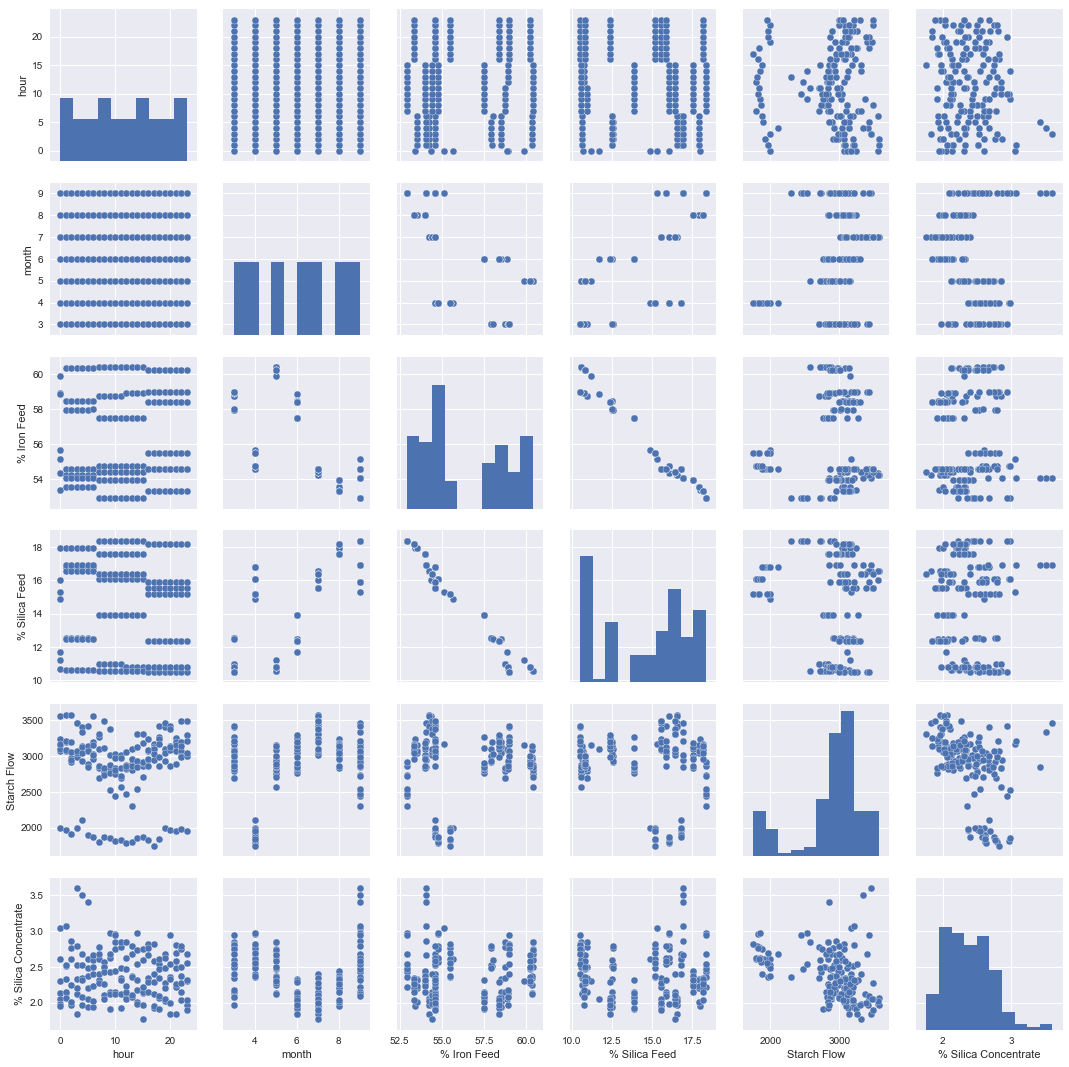

In [11]:
sns.pairplot(df[["hour","month","% Iron Feed","% Silica Feed","Starch Flow","% Silica Concentrate"]])

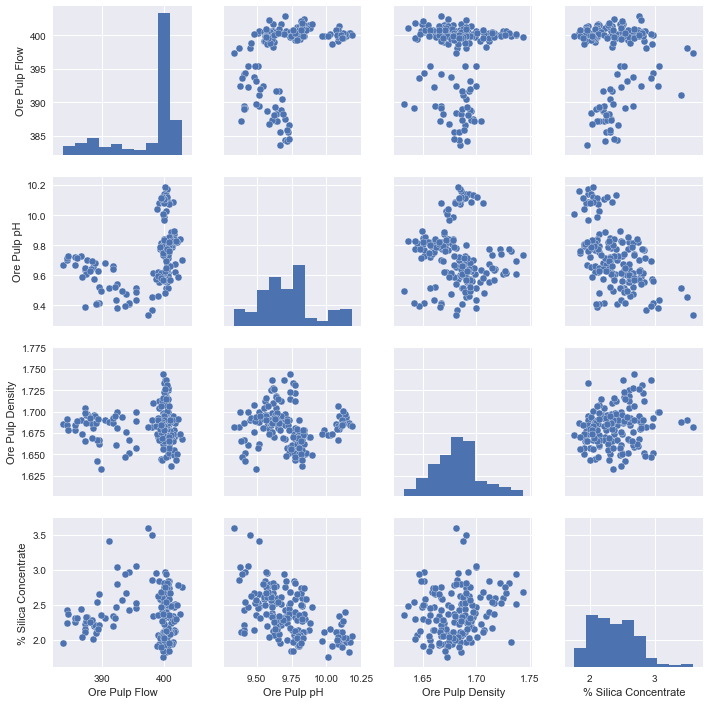

In [12]:
sns.pairplot(df[["Ore Pulp Flow","Ore Pulp pH","Ore Pulp Density","% Silica Concentrate"]])

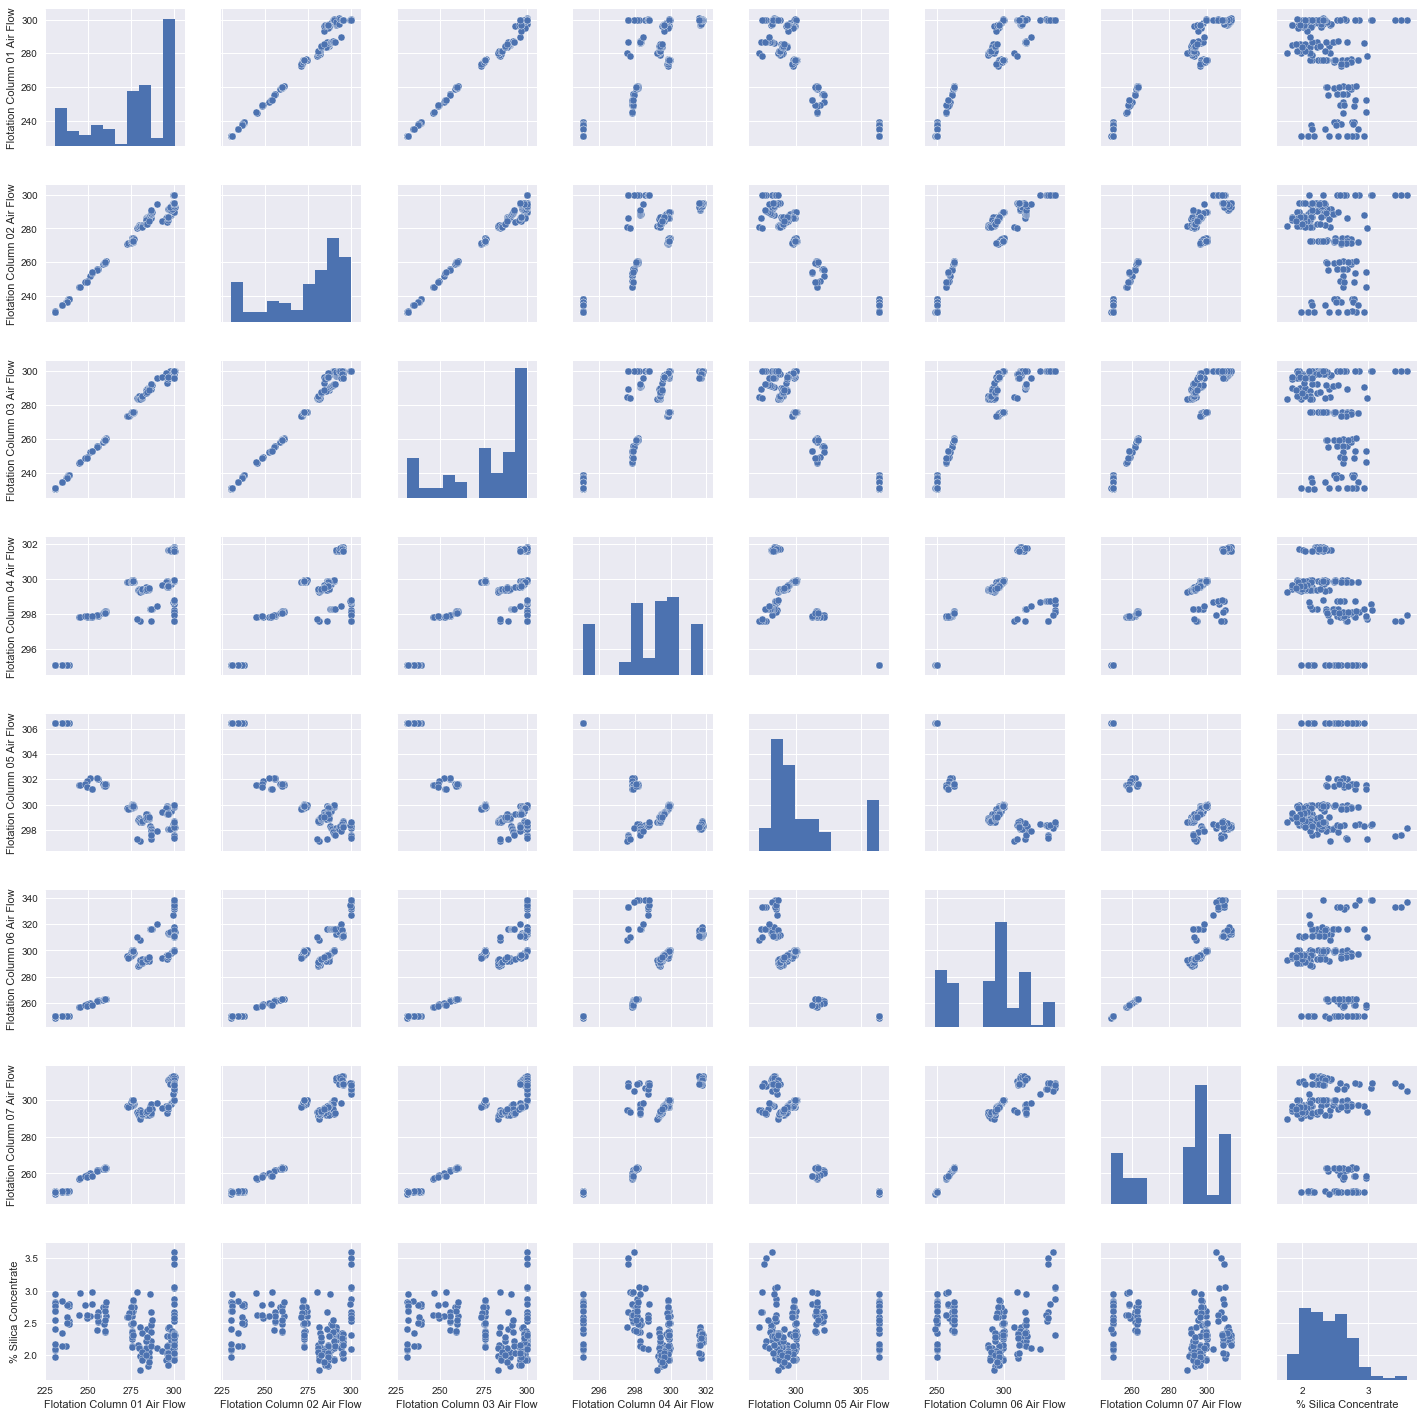

In [13]:
sns.pairplot(df[["Flotation Column 01 Air Flow","Flotation Column 02 Air Flow","Flotation Column 03 Air Flow","Flotation Column 04 Air Flow","Flotation Column 05 Air Flow","Flotation Column 06 Air Flow","Flotation Column 07 Air Flow","% Silica Concentrate"]])

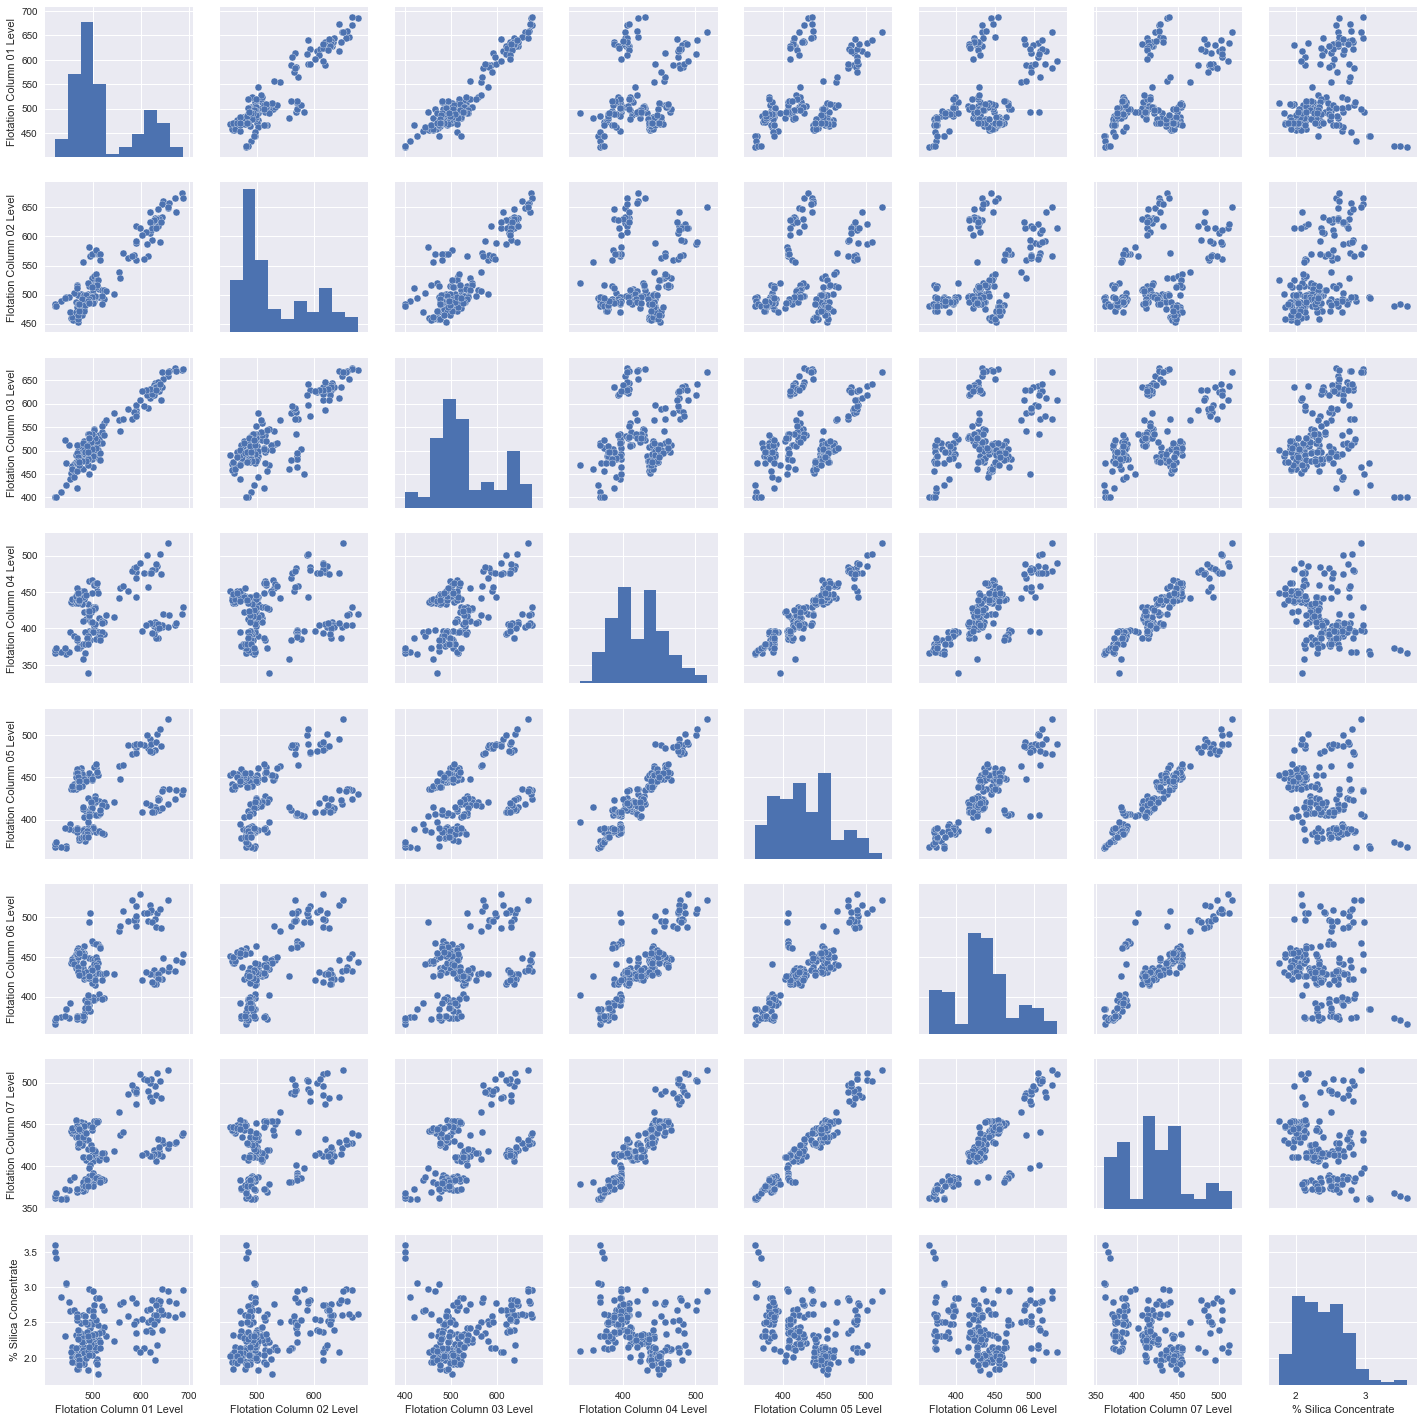

In [14]:
sns.pairplot(df[["Flotation Column 01 Level","Flotation Column 02 Level","Flotation Column 03 Level","Flotation Column 04 Level","Flotation Column 05 Level","Flotation Column 06 Level","Flotation Column 07 Level","% Silica Concentrate"]])

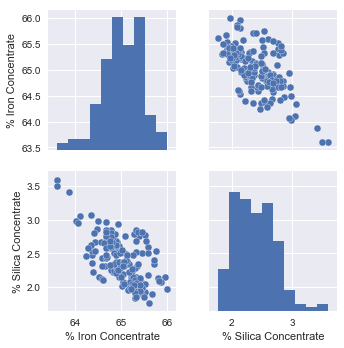

In [15]:
sns.pairplot(df[["% Iron Concentrate","% Silica Concentrate"]])

### Analizando los datos nuevos

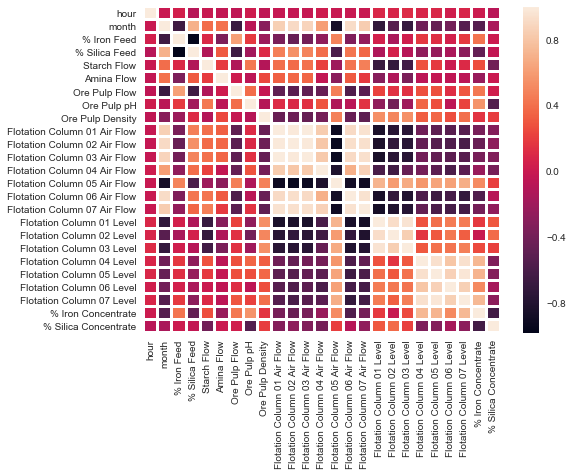

In [16]:
sns.set(rc={"figure.figsize":(8,6)})
sns.heatmap(df1.corr(),linewidths=2)

In [17]:
# Escalando los datos
data_scale = StandardScaler().fit_transform(df1)
df_scale=pd.DataFrame(data_scale,columns=df1.columns)

In [18]:
variable=[df_scale["hour"],df_scale["month"],df_scale["% Iron Feed"],df_scale["% Silica Feed"],df_scale["Starch Flow"],df_scale["Amina Flow"],df_scale["Ore Pulp Flow"],
          df_scale["Ore Pulp pH"],df_scale["Ore Pulp Density"],df_scale["Flotation Column 01 Air Flow"],df_scale["Flotation Column 02 Air Flow"],df_scale["Flotation Column 03 Air Flow"],
         df_scale["Flotation Column 04 Air Flow"],df_scale["Flotation Column 05 Air Flow"],df_scale["Flotation Column 06 Air Flow"],df_scale["Flotation Column 07 Air Flow"],df_scale["Flotation Column 01 Level"],df_scale["Flotation Column 02 Level"],
         df_scale["Flotation Column 03 Level"],df_scale["Flotation Column 04 Level"],df_scale["Flotation Column 05 Level"],df_scale["Flotation Column 06 Level"],df_scale["Flotation Column 07 Level"],
         df_scale["% Iron Concentrate"]]

In [19]:
df2=df1.drop('% Silica Concentrate',axis=1)

# Clustering

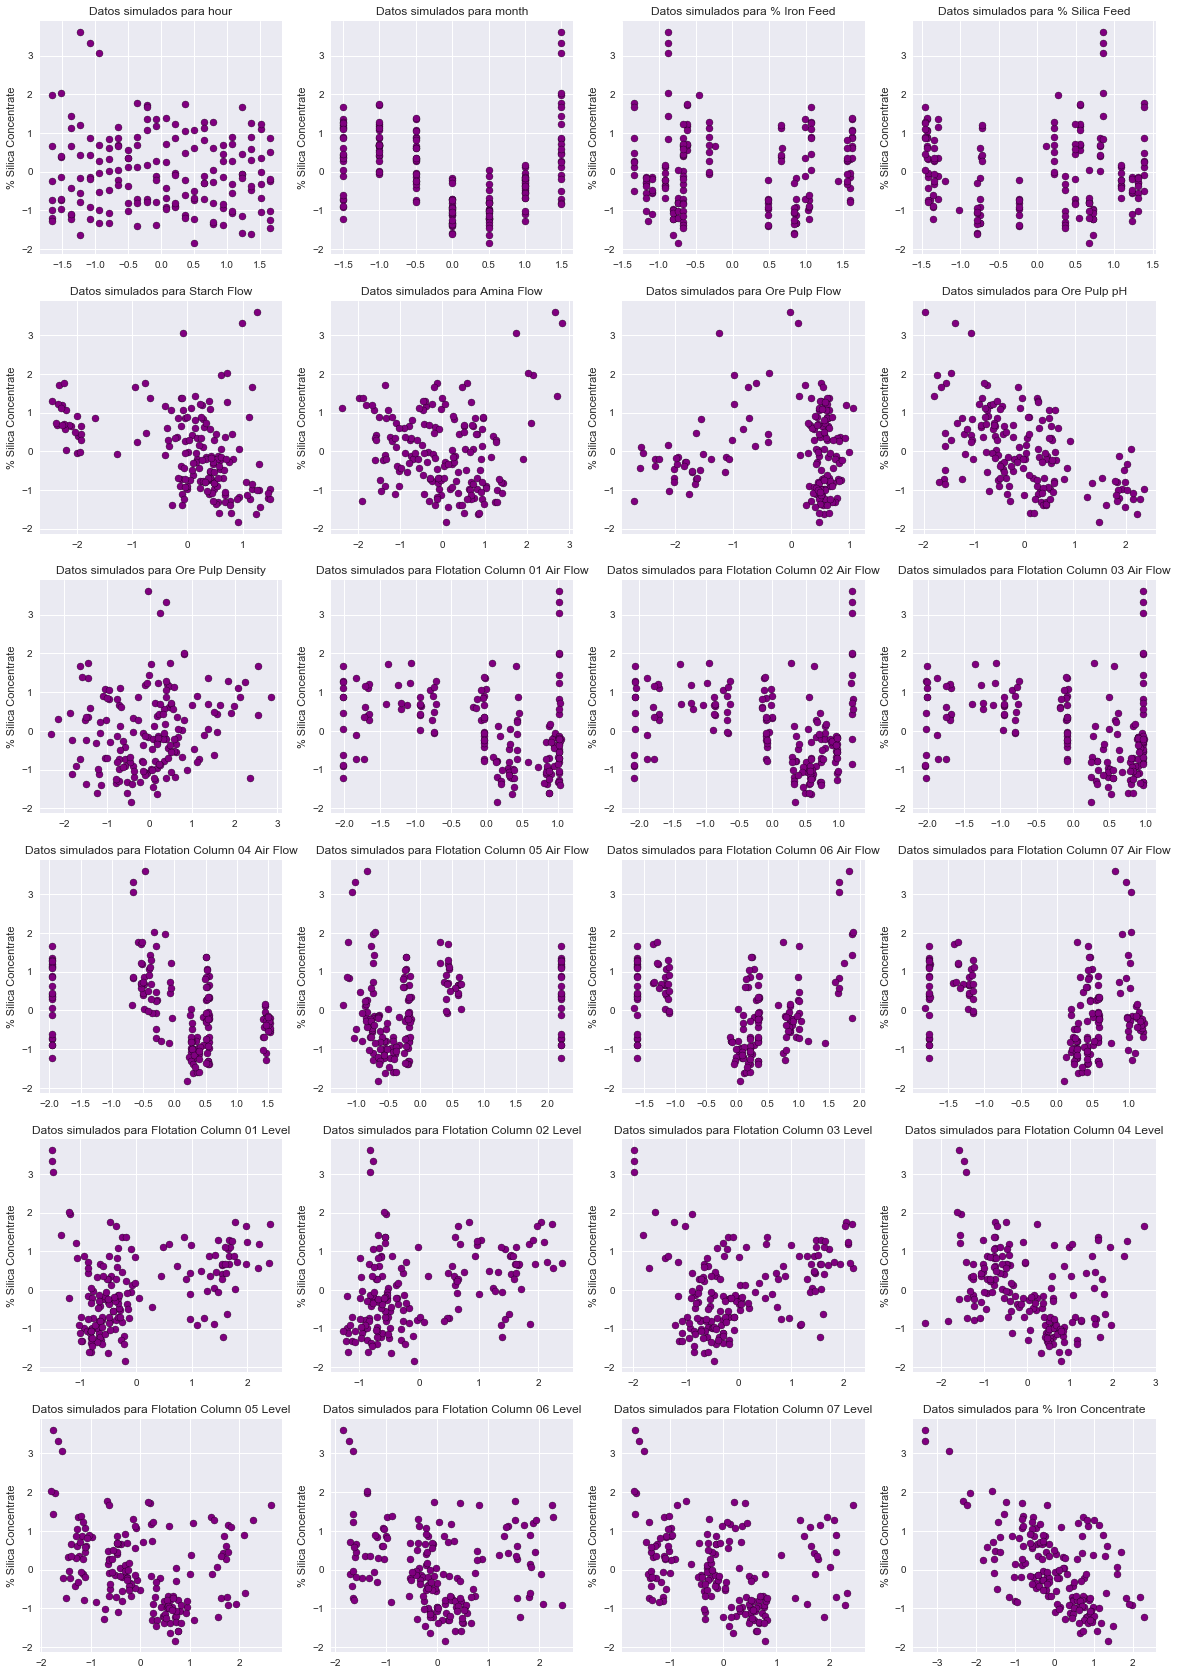

In [20]:
#Visualizando datos
nombres=df2.columns

plt.figure(figsize=(20,30))
for i in range(len(variable)):
    ax= plt.subplot(6,4, i+1)
    ax.scatter(variable[i],df_scale['% Silica Concentrate'], c = 'purple', marker = 'o',edgecolor = 'black')
    ax.set_title("Datos simulados para " + nombres[i])
    ax.set_ylabel('% Silica Concentrate')

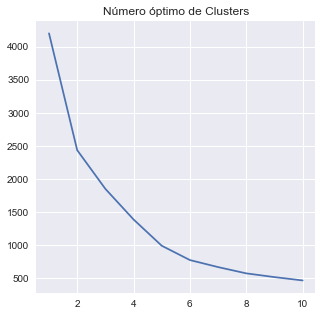

In [21]:
#Número óptimo de clusters

from sklearn.cluster import KMeans
ssd=[]
plt.figure(figsize=(5,5))
for i in range(1,11):
    km=KMeans(n_clusters=i,max_iter=300)
    km.fit(df_scale)
    ssd.append(km.inertia_)
ax= plt.subplot()
ax.plot(range(1,11),ssd)
ax.set_title("Número óptimo de Clusters")
ssd.clear()

# K-Means

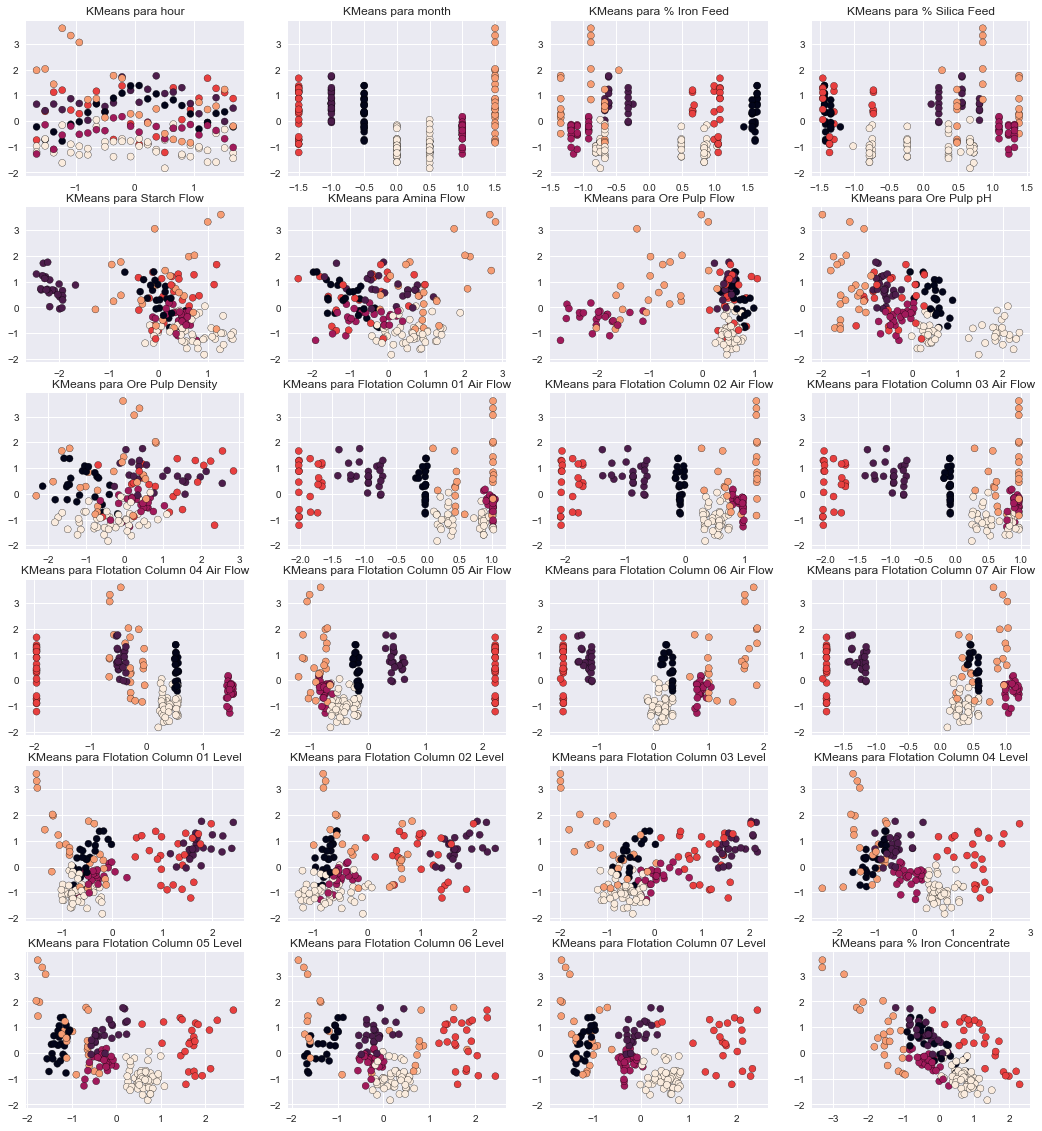

In [22]:
y=[]

km=KMeans(n_clusters=6, random_state=0)
km.fit(df_scale.drop('% Silica Concentrate', axis=1))
if hasattr(km, 'labels_'):
    y.append(km.labels_.astype(np.int))
else:
    y.append(km.predict(df_scale.drop('% Silica Concentrate', axis=1)))
    
plt.figure(figsize=(18,20))
for i in range(len(y)):
    for j in range(len(variable)):
        ax= plt.subplot(6,4, 1+j)
        ax.scatter(variable[j],df_scale['% Silica Concentrate'], c = y[i], marker = 'o',edgecolor = 'black')
        ax.set_title("KMeans para " + nombres[j])

# DBSCAN

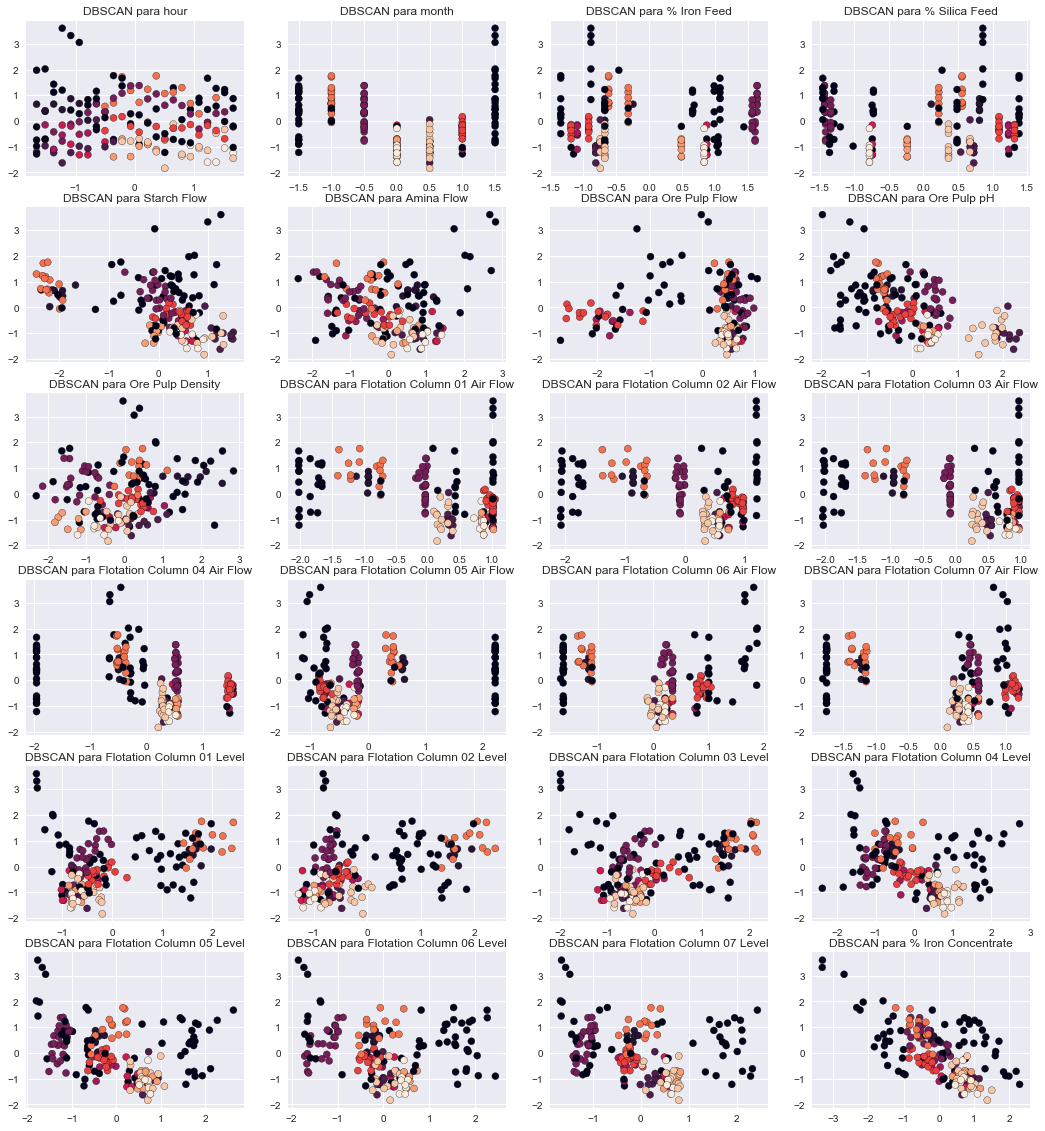

In [23]:
from sklearn.cluster import DBSCAN
y=[]
dbscan=DBSCAN(eps=1.3)
dbscan.fit(df_scale.drop('% Silica Concentrate', axis=1))
if hasattr(dbscan, 'labels_'):
    y.append(dbscan.labels_.astype(np.int))
else:
    y.append(dbscan.predict(df_scale.drop('% Silica Concentrate', axis=1)))

plt.figure(figsize=(18,20))
for i in range(len(y)):
    for j in range(len(variable)):
        ax= plt.subplot(6,4, 1+j)
        ax.scatter(variable[j],df_scale['% Silica Concentrate'], c = y[i], marker = 'o',edgecolor = 'black')
        ax.set_title("DBSCAN para " + nombres[j])

# AgglomerativeClustering

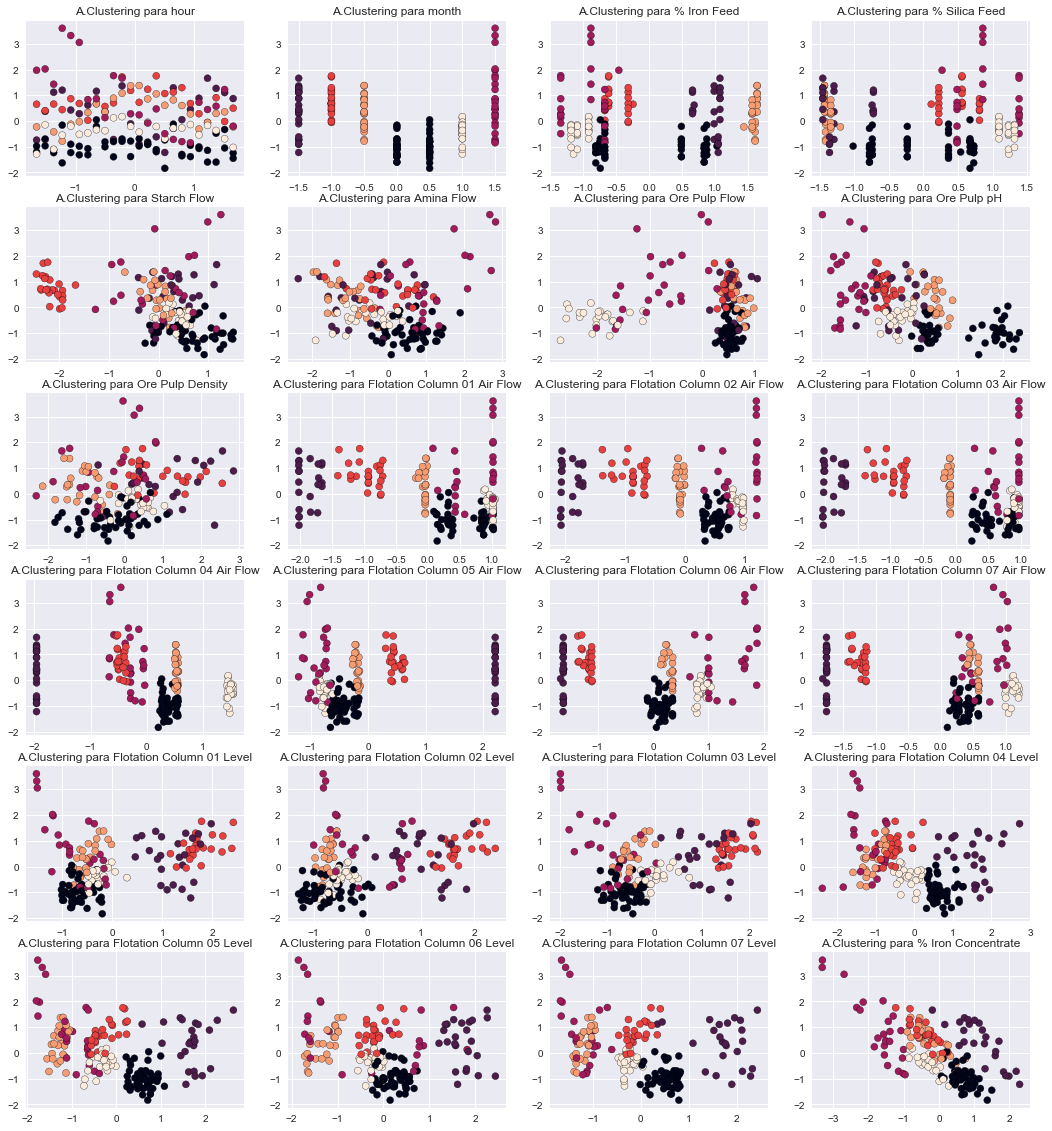

In [24]:
from sklearn.cluster import AgglomerativeClustering
y=[]

ag=AgglomerativeClustering(affinity='euclidean',n_clusters=6)
ag.fit(df_scale.drop('% Silica Concentrate', axis=1))
if hasattr(ag, 'labels_'):
    y.append(ag.labels_.astype(np.int))
else:
    y.append(ag.predict(df_scale.drop('% Silica Concentrate', axis=1)))
    
plt.figure(figsize=(18,20))
for i in range(len(y)):
    for j in range(len(variable)):
        ax= plt.subplot(6,4, 1+j)
        ax.scatter(variable[j],df_scale['% Silica Concentrate'], c = y[i], marker = 'o',edgecolor = 'black')
        ax.set_title("A.Clustering para " + nombres[j])


## Entrenando el modelo

In [25]:
X = df_scale.drop(['% Silica Concentrate'],axis=1)
y = df_scale['% Silica Concentrate']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Regresión Lineal

In [26]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(normalize=True)
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

### Evaluación del Modelo

In [27]:
print(lm.intercept_)

0.010012463039076842


In [28]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

Coefficient
hour                            -0.074706
month                           -0.401005
% Iron Feed                     -1.435841
% Silica Feed                   -1.052404
Starch Flow                     -0.243960
Amina Flow                      -0.045965
Ore Pulp Flow                    0.457250
Ore Pulp pH                      0.191645
Ore Pulp Density                 0.089418
Flotation Column 01 Air Flow    -0.010722
Flotation Column 02 Air Flow    -1.091922
Flotation Column 03 Air Flow    -0.305872
Flotation Column 04 Air Flow     0.500422
Flotation Column 05 Air Flow     0.573963
Flotation Column 06 Air Flow     1.921265
Flotation Column 07 Air Flow    -0.551061
Flotation Column 01 Level       -0.310527
Flotation Column 02 Level       -0.604766
Flotation Column 03 Level        0.457797
Flotation Column 04 Level       -0.091934
Flotation Column 05 Level        0.036067
Flotation Column 06 Level        0.268536
Flotation Column 07 Level        0.186403
% Iron Concentrate              -1.186245

Text(0,0.5,'predicciones')

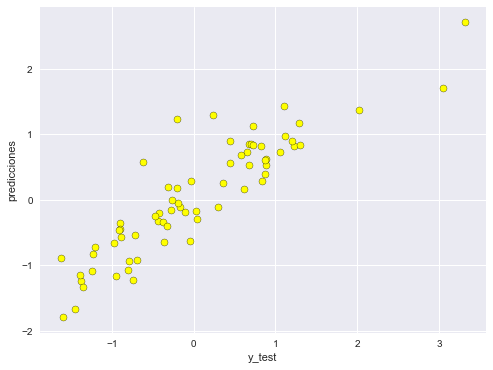

In [29]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')


In [30]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.3406251917127031
MSE: 0.19672538942910586
RMSE: 0.44353735967684377


In [31]:
metrics.r2_score(y_test,predictions)

0.809187964427513

## Regresión Ridge

In [32]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=0.001, normalize=True)
ridge.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [33]:
coeff_df3 = pd.DataFrame(ridge.coef_,X.columns,columns=['Coefficient'])
ridge_pred=ridge.predict(X_test)
coeff_df3

Coefficient
hour                            -0.068398
month                            0.092552
% Iron Feed                     -0.756137
% Silica Feed                   -0.557380
Starch Flow                     -0.236715
Amina Flow                      -0.019908
Ore Pulp Flow                    0.430155
Ore Pulp pH                      0.154305
Ore Pulp Density                 0.075590
Flotation Column 01 Air Flow    -0.083077
Flotation Column 02 Air Flow    -0.670654
Flotation Column 03 Air Flow    -0.453034
Flotation Column 04 Air Flow     0.291276
Flotation Column 05 Air Flow     0.652827
Flotation Column 06 Air Flow     1.180219
Flotation Column 07 Air Flow    -0.193725
Flotation Column 01 Level       -0.225593
Flotation Column 02 Level       -0.588429
Flotation Column 03 Level        0.478730
Flotation Column 04 Level       -0.057586
Flotation Column 05 Level        0.029101
Flotation Column 06 Level        0.124114
Flotation Column 07 Level        0.200050
% Iron Concentrate              -1.183924

Text(0,0.5,'predicciones')

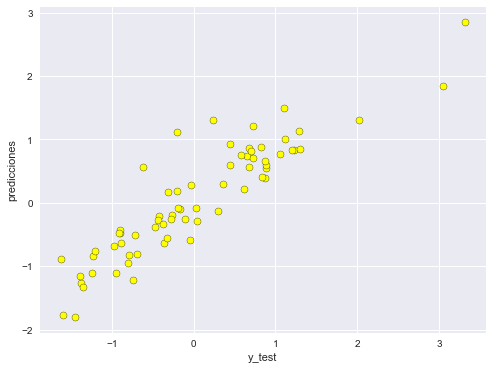

In [34]:
predictions = ridge.predict(X_test)
plt.scatter(y_test,predictions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

In [35]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, ridge_pred))
print('MSE:', metrics.mean_squared_error(y_test, ridge_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, ridge_pred)))

MAE: 0.32241043713685985
MSE: 0.17960130022595489
RMSE: 0.42379393604198123


In [36]:
metrics.r2_score(y_test,ridge_pred)

0.8257973219062821

## Regresión Lasso

In [37]:
from sklearn.linear_model import Lasso
lasso= Lasso(alpha=0.001, normalize=True)
lasso.fit(X_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

###  Evaluación del modelo

In [38]:
lasso_pred=lasso.predict(X_test)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, lasso_pred))
print('MSE:', metrics.mean_squared_error(y_test, lasso_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lasso_pred)))

MAE: 0.3204190635160755
MSE: 0.15860566033113754
RMSE: 0.3982532615448837


In [39]:
metrics.r2_score(y_test,lasso_pred)

0.8461618554222812

In [40]:
print(f"Intercept:{lasso.intercept_}")
coeff_df2 = pd.DataFrame(lasso.coef_,X.columns,columns=['Coefficient'])
lasso_pred=lasso.predict(X_test)
coeff_df2

Intercept:0.00493438252607372


Coefficient
hour                            -0.033602
month                            0.000000
% Iron Feed                      0.000000
% Silica Feed                   -0.000000
Starch Flow                      0.000000
Amina Flow                       0.000000
Ore Pulp Flow                    0.177332
Ore Pulp pH                      0.036049
Ore Pulp Density                 0.065367
Flotation Column 01 Air Flow    -0.000000
Flotation Column 02 Air Flow    -0.000000
Flotation Column 03 Air Flow    -0.460078
Flotation Column 04 Air Flow    -0.000000
Flotation Column 05 Air Flow     0.412282
Flotation Column 06 Air Flow     0.153044
Flotation Column 07 Air Flow     0.000000
Flotation Column 01 Level       -0.000000
Flotation Column 02 Level       -0.226757
Flotation Column 03 Level        0.105659
Flotation Column 04 Level        0.043184
Flotation Column 05 Level        0.000000
Flotation Column 06 Level       -0.000000
Flotation Column 07 Level        0.000000
% Iron Concentrate              -1.080647

Text(0,0.5,'predicciones')

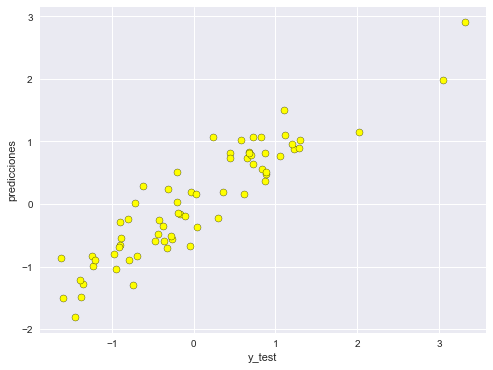

In [41]:
predictions = lasso.predict(X_test)
plt.scatter(y_test,predictions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## GridSearchCV para Lasso

In [42]:
from sklearn.model_selection import GridSearchCV
grid = {'alpha': [0.1, 0.01, 0.05, 0.001, 0.005,0.0001,0.0005],
        'tol': [0.1, 0.01,0.001,0.0001,0.00001,0.000001,0.0000001]}
red = GridSearchCV(Lasso(), grid, refit=True, verbose=3, cv=5)
red.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.8022943518431926, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.6224836715402816, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7362810415033063, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7314348207325179, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] .... alpha=0.1, tol=0.1, score=0.45892330991354474, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha=0.1, tol=0.01, score=0.8225963940614212, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] . alpha=0.01, tol=0.0001, score=0.5790350495764189, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8811976796725074, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] ... alpha=0.01, tol=1e-05, score=0.776027903135803, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7726483777915247, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] ... alpha=0.01, tol=1e-05, score=0.755689820818535, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.5793331641266686, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.8812019996755566, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.05, tol=1e-07, score=0.7655951877953537, total=   0.0s
[CV] alpha=0.05, tol=1e-07 ...........................................
[CV] .. alpha=0.05, tol=1e-07, score=0.5641930076729773, total=   0.0s
[CV] alpha=0.001, tol=0.1 ............................................
[CV] ... alpha=0.001, tol=0.1, score=0.8247767293847035, total=   0.0s
[CV] alpha=0.001, tol=0.1 ............................................
[CV] ... alpha=0.001, tol=0.1, score=0.7276534387678276, total=   0.0s
[CV] alpha=0.001, tol=0.1 ............................................
[CV] ... alpha=0.001, tol=0.1, score=0.7499297056872228, total=   0.0s
[CV] alpha=0.001, tol=0.1 ............................................
[CV] ... alpha=0.001, tol=0.1, score=0.7253755635296623, total=   0.0s
[CV] alpha=0.001, tol=0.1 ............................................
[CV] .. alpha=0.001, tol=0.1, score=0.34501104714734987, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.005, tol=0.01, score=0.8751946940801001, total=   0.0s
[CV] alpha=0.005, tol=0.01 ...........................................
[CV] .. alpha=0.005, tol=0.01, score=0.8021157042961454, total=   0.0s
[CV] alpha=0.005, tol=0.01 ...........................................
[CV] .. alpha=0.005, tol=0.01, score=0.8203516179934062, total=   0.0s
[CV] alpha=0.005, tol=0.01 ...........................................
[CV] .. alpha=0.005, tol=0.01, score=0.7167088987074381, total=   0.0s
[CV] alpha=0.005, tol=0.01 ...........................................
[CV] .. alpha=0.005, tol=0.01, score=0.5439025606970014, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] . alpha=0.005, tol=0.001, score=0.8733921142676022, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] . alpha=0.005, tol=0.001, score=0.7864178580654201, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.0001, tol=0.01, score=0.5738343612419021, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.7910178232244824, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.8097044906484596, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.8287243001603932, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.6404100202318709, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.5738343612419021, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV]  alpha=0.0001, tol=0.0001, score=0.7910178232244824, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.0005, tol=0.01, score=0.8293994409068325, total=   0.0s
[CV] alpha=0.0005, tol=0.01 ..........................................
[CV] . alpha=0.0005, tol=0.01, score=0.6533924362968179, total=   0.0s
[CV] alpha=0.0005, tol=0.01 ..........................................
[CV] . alpha=0.0005, tol=0.01, score=0.5751047761753225, total=   0.0s
[CV] alpha=0.0005, tol=0.001 .........................................
[CV] . alpha=0.0005, tol=0.001, score=0.805716544558062, total=   0.0s
[CV] alpha=0.0005, tol=0.001 .........................................
[CV]  alpha=0.0005, tol=0.001, score=0.8234743019445279, total=   0.0s
[CV] alpha=0.0005, tol=0.001 .........................................
[CV]  alpha=0.0005, tol=0.001, score=0.8320826922868957, total=   0.0s
[CV] alpha=0.0005, tol=0.001 .........................................
[CV]  alpha=0.0005, tol=0.001, score=0.6517383692400698, total=   0.0s
[CV] alpha=0.0005, tol=0.001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.1, 0.01, 0.05, 0.001, 0.005, 0.0001, 0.0005], 'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [43]:
red.best_params_

{'alpha': 0.005, 'tol': 0.001}

In [44]:
predicciones_red = red.predict(X_test)

In [45]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_red))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_red))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_red)))

MAE: 0.3110633206700073
MSE: 0.15542592774886677
RMSE: 0.3942409513848945


In [46]:
metrics.r2_score(y_test,predicciones_red)

0.8492460086592375

Text(0,0.5,'predicciones')

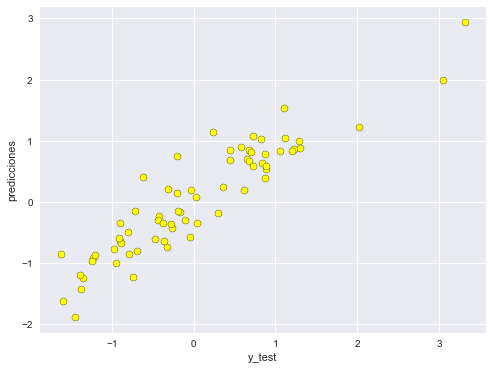

In [47]:
plt.scatter(y_test,predicciones_red, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Random Forest Regressor

In [48]:
from sklearn.ensemble import RandomForestRegressor
rf  = RandomForestRegressor( n_estimators = 10, criterion = 'mse', max_depth = None, max_features = 'auto', oob_score = False, n_jobs = -1 ,random_state = 101)
rf.fit(X_train, y_train)

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=101, verbose=0, warm_start=False)

In [49]:
preditions = rf.predict(X_test)

In [50]:
print('MAE:', metrics.mean_absolute_error(y_test, preditions))
print('MSE:', metrics.mean_squared_error(y_test, preditions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preditions)))

MAE: 0.45361453883209113
MSE: 0.34141303528152234
RMSE: 0.58430560093287


In [51]:
metrics.r2_score(y_test,preditions)

0.6688494737659408

Text(0,0.5,'predicciones')

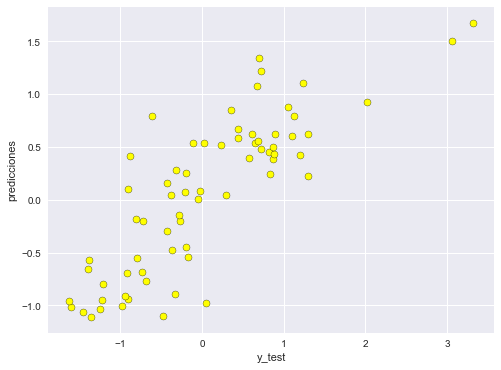

In [52]:
plt.scatter(y_test,preditions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## GridSearchCV para Random Forest Regressor

In [53]:
grid = {'n_estimators': [180],
        'max_features': [5, 7, 9],
        'max_depth'   : [None, 3, 10, 20]}

In [54]:
red1 = GridSearchCV(RandomForestRegressor(),grid ,cv = 5,refit= True,verbose= 3)
red1.fit(X_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=5, n_estimators=180 ................
[CV]  max_depth=None, max_features=5, n_estimators=180, score=0.6860059182451699, total=   0.2s
[CV] max_depth=None, max_features=5, n_estimators=180 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=None, max_features=5, n_estimators=180, score=0.5496360814390131, total=   0.1s
[CV] max_depth=None, max_features=5, n_estimators=180 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=None, max_features=5, n_estimators=180, score=0.6484499560974364, total=   0.2s
[CV] max_depth=None, max_features=5, n_estimators=180 ................
[CV]  max_depth=None, max_features=5, n_estimators=180, score=0.5368282281144975, total=   0.1s
[CV] max_depth=None, max_features=5, n_estimators=180 ................
[CV]  max_depth=None, max_features=5, n_estimators=180, score=0.2961754253364567, total=   0.1s
[CV] max_depth=None, max_features=7, n_estimators=180 ................
[CV]  max_depth=None, max_features=7, n_estimators=180, score=0.6851145005998087, total=   0.2s
[CV] max_depth=None, max_features=7, n_estimators=180 ................
[CV]  max_depth=None, max_features=7, n_estimators=180, score=0.5621238393149703, total=   0.1s
[CV] max_depth=None, max_features=7, n_estimators=180 ................
[CV]  max_depth=None, max_features=7, n_estimators=180, score=0.6746158420417159, total=   0.1s
[CV] max_depth=None, max_features=7, n_estimators=180 ...............

[CV]  max_depth=20, max_features=7, n_estimators=180, score=0.6934647171874762, total=   0.1s
[CV] max_depth=20, max_features=7, n_estimators=180 ..................
[CV]  max_depth=20, max_features=7, n_estimators=180, score=0.554075672877922, total=   0.1s
[CV] max_depth=20, max_features=7, n_estimators=180 ..................
[CV]  max_depth=20, max_features=7, n_estimators=180, score=0.3113640045035231, total=   0.1s
[CV] max_depth=20, max_features=9, n_estimators=180 ..................
[CV]  max_depth=20, max_features=9, n_estimators=180, score=0.6785147634840037, total=   0.2s
[CV] max_depth=20, max_features=9, n_estimators=180 ..................
[CV]  max_depth=20, max_features=9, n_estimators=180, score=0.5986379532198144, total=   0.1s
[CV] max_depth=20, max_features=9, n_estimators=180 ..................
[CV]  max_depth=20, max_features=9, n_estimators=180, score=0.6629828571745944, total=   0.2s
[CV] max_depth=20, max_features=9, n_estimators=180 ..................
[CV]  max_d

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   14.8s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [180], 'max_features': [5, 7, 9], 'max_depth': [None, 3, 10, 20]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [55]:
red1.best_params_

{'max_depth': None, 'max_features': 9, 'n_estimators': 180}

In [56]:
predicciones_red1 = red1.predict(X_test)

In [57]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_red1))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_red1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_red1)))

MAE: 0.39992028947914027
MSE: 0.27560902089468026
RMSE: 0.5249847815838857


In [58]:
metrics.r2_score(y_test,predicciones_red1)

0.7326754901760874

Text(0,0.5,'predicciones')

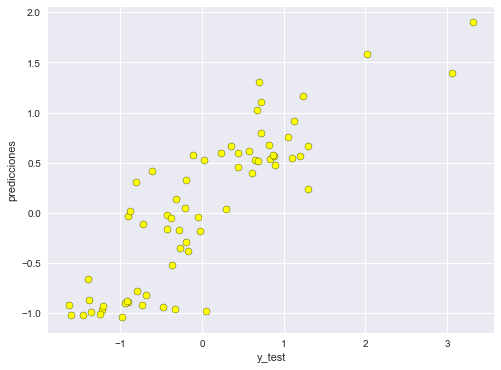

In [59]:
plt.scatter(y_test,predicciones_red1, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Support Vector Regression

In [60]:
from sklearn.svm import SVR
vr= SVR(kernel='rbf', tol=0.001, C=1.0)
vr.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [61]:
preditions = vr.predict(X_test)

In [62]:
print('MAE:', metrics.mean_absolute_error(y_test, preditions))
print('MSE:', metrics.mean_squared_error(y_test, preditions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preditions)))

MAE: 0.38125998166234576
MSE: 0.24583626744960885
RMSE: 0.4958187848898112


In [63]:
metrics.r2_score(y_test,preditions)

0.7615533066386091

Text(0,0.5,'predicciones')

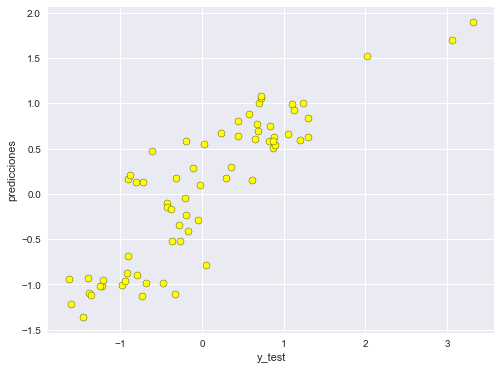

In [64]:
plt.scatter(y_test,preditions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## GridSearchCV para Support Vector Regression

In [65]:
grid = {'C': [0.1, 1, 10, 100, 1000],
       'gamma': [1, 1/30, 0.1, 0.01, 0.001, 0.0001],
        'tol': [0.1, 0.01,0.001,0.0001,0.00001,0.000001,0.0000001],
       'kernel':['rbf']}

In [66]:
red2 = GridSearchCV(SVR(),grid , cv = 5, refit= True, verbose= 3)
red2.fit(X_train, y_train)

Fitting 5 folds for each of 210 candidates, totalling 1050 fits
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.1 .............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.1, score=0.08575870120344121, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.1 .............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.1, score=0.04336027247023767, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.1 .............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.1, score=0.10948330325250066, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.1 .............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.1, score=-0.18305457796344426, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.1 .............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.1, score=-0.11764206152095104, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf, tol=0.01 ............................
[CV]  C=0.1, gamma=1, kernel=rbf, tol=0.01, score=0.08250776323339759, total=   0.0s
[CV

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05, score=0.45843461670220137, total=   0.0s
[CV] C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05 .........
[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05, score=0.24372973394647013, total=   0.0s
[CV] C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05 .........
[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05, score=0.49789882057682955, total=   0.0s
[CV] C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05 .........
[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05, score=0.2468343631550639, total=   0.0s
[CV] C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05 .........
[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-05, score=0.36483663408189204, total=   0.0s
[CV] C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-06 .........
[CV]  C=0.1, gamma=0.03333333333333333, kernel=rbf, tol=1e-06, score=0.4584341017279009, total=   0.0s
[CV] C=0.1, gamma=0.033

[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.1, score=0.143479050285372, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.1 ..........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.1, score=0.418375067933237, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.1 ..........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.1, score=0.11038745368358482, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.1 ..........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.1, score=0.2639813827042289, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.01 .........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.01, score=0.3005480442715085, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.01 .........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.01, score=0.13806173001622224, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf, tol=0.01 .........................
[CV]  C=0.1, gamma=0.01, kernel=rbf, tol=0.01, score=0.4

[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-06, score=-0.1389118103130682, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-06 .......................
[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-06, score=-0.09833667408518476, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-07 .......................
[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-07, score=0.04917510265414826, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-07 .......................
[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-07, score=-0.03282209928395052, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-07 .......................
[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-07, score=0.06210217440943078, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-07 .......................
[CV]  C=0.1, gamma=0.001, kernel=rbf, tol=1e-07, score=-0.1389118103130682, total=   0.0s
[CV] C=0.1, gamma=0.001, kernel=rbf, tol=1e-07 .......................
[CV]  C=0.1, gamma=0.001, kernel

[CV]  C=1, gamma=1, kernel=rbf, tol=0.001, score=0.3692544224711948, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.001 .............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.001, score=0.19330147448150814, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.0001 ............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.0001, score=0.3602485283298788, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.0001 ............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.0001, score=0.24996069719892633, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.0001 ............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.0001, score=0.5551636728396986, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.0001 ............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.0001, score=0.36925815885542745, total=   0.0s
[CV] C=1, gamma=1, kernel=rbf, tol=0.0001 ............................
[CV]  C=1, gamma=1, kernel=rbf, tol=0.0001, score=0.19329556010081372

[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.001, score=0.39610933534443615, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.0001, score=0.7168796865977441, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.0001, score=0.43111882888060415, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.0001, score=0.5916084457614643, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.0001, score=0.5265012898078874, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=0.0001 .........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=0.0001, score=0.39592727526922356, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf, tol=1e-05 ..........................
[CV]  C=1, gamma=0.01, kernel=rbf, tol=1e-05, scor

[CV]  C=1, gamma=0.001, kernel=rbf, tol=1e-07, score=0.2999844692013812, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.1 ..........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.1, score=0.04845291021198883, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.1 ..........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.1, score=-0.035360350549187514, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.1 ..........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.1, score=0.06096077426464963, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.1 ..........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.1, score=-0.1368529124989124, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.1 ..........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.1, score=-0.09864518164715719, total=   0.0s
[CV] C=1, gamma=0.0001, kernel=rbf, tol=0.01 .........................
[CV]  C=1, gamma=0.0001, kernel=rbf, tol=0.01, sc

[CV]  C=10, gamma=1, kernel=rbf, tol=1e-05, score=0.5895933262876204, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-05 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-05, score=0.43981700210736635, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-05 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-05, score=0.1753666678785153, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-06 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-06, score=0.4155566793216686, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-06 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-06, score=0.28008534223125625, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-06 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-06, score=0.5895934591532841, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf, tol=1e-06 ............................
[CV]  C=10, gamma=1, kernel=rbf, tol=1e-06, score=0.4398168079594112

[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.1, score=0.20247724815615123, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.01 ...........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.01, score=0.7651700361237873, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.01 ...........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.01, score=0.5762043398005869, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.01 ...........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.01, score=0.5883792668735789, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.01 ...........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.01, score=0.5980456379978444, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.01 ...........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.01, score=0.1960448496873135, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf, tol=0.001 ..........................
[CV]  C=10, gamma=0.1, kernel=rbf, tol=0.001, score=0.7652971859

[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-05, score=0.7991500284427293, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-05 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-05, score=0.707248406818277, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-05 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-05, score=0.576950618282896, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-06 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-06, score=0.8525150224219851, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-06 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-06, score=0.7883870895906697, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-06 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-06, score=0.799150337185666, total=   0.0s
[CV] C=10, gamma=0.01, kernel=rbf, tol=1e-06 .........................
[CV]  C=10, gamma=0.01, kernel=rbf, tol=1e-06, score=0.

[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.01, score=0.21249736443743028, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.01 ........................
[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.01, score=0.29996089315149144, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.001 .......................
[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.001, score=0.3140067641480446, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.001 .......................
[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.001, score=0.08076501540004531, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.001 .......................
[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.001, score=0.4749385606299802, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.001 .......................
[CV]  C=10, gamma=0.0001, kernel=rbf, tol=0.001, score=0.21226512064433092, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf, tol=0.001 .......................
[CV]  C=10, gamma=0.0001, kernel=rbf, 

[CV]  C=100, gamma=1, kernel=rbf, tol=1e-07, score=0.4155566946020605, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf, tol=1e-07 ...........................
[CV]  C=100, gamma=1, kernel=rbf, tol=1e-07, score=0.2800853281201652, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf, tol=1e-07 ...........................
[CV]  C=100, gamma=1, kernel=rbf, tol=1e-07, score=0.5895934311993292, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf, tol=1e-07 ...........................
[CV]  C=100, gamma=1, kernel=rbf, tol=1e-07, score=0.4398168052546589, total=   0.0s
[CV] C=100, gamma=1, kernel=rbf, tol=1e-07 ...........................
[CV]  C=100, gamma=1, kernel=rbf, tol=1e-07, score=0.175366328973656, total=   0.0s
[CV] C=100, gamma=0.03333333333333333, kernel=rbf, tol=0.1 ...........
[CV]  C=100, gamma=0.03333333333333333, kernel=rbf, tol=0.1, score=0.8183385848501096, total=   0.0s
[CV] C=100, gamma=0.03333333333333333, kernel=rbf, tol=0.1 ...........
[CV]  C=100, gamma=0.03333333333333333, kernel=rb

[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-05, score=0.9030534580275018, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-05 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-05, score=0.8129689721452853, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-05 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-05, score=0.6576300458397027, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-05 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-05, score=0.3214767391317763, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-06 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-06, score=0.8754845536588374, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-06 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-06, score=0.9030532698257808, total=   0.0s
[CV] C=100, gamma=0.01, kernel=rbf, tol=1e-06 ........................
[CV]  C=100, gamma=0.01, kernel=rbf, tol=1e-06

[CV] C=1000, gamma=1, kernel=rbf, tol=0.0001 .........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=0.0001, score=0.2800876728625106, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=0.0001 .........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=0.0001, score=0.5895943764361679, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=0.0001 .........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=0.0001, score=0.43981478434618326, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=0.0001 .........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=0.0001, score=0.1753663219491042, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=1e-05 ..........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=1e-05, score=0.41555680361128133, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=1e-05 ..........................
[CV]  C=1000, gamma=1, kernel=rbf, tol=1e-05, score=0.2800854414204791, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf, tol=1e-05 ........

[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.1, score=0.8501118604310433, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.1 .........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.1, score=0.6824758330946422, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.1 .........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.1, score=0.5404752697997848, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.1 .........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.1, score=0.000977113061660484, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.01 ........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.01, score=0.7902432759437088, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.01 ........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.01, score=0.8424484592310076, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf, tol=0.01 ........................
[CV]  C=1000, gamma=0.01, kernel=rbf, tol=0.01, 

[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.001, score=0.5946767004504133, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.001 .....................
[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.001, score=0.7971803897450745, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.001 .....................
[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.001, score=0.7053527219664664, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.001 .....................
[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.001, score=0.536877515014303, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.0001 ....................
[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.0001, score=0.8549493785157813, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.0001 ....................
[CV]  C=1000, gamma=0.0001, kernel=rbf, tol=0.0001, score=0.5947812906254001, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf, tol=0.0001 ....................
[CV]  C=1000, gamma=0.0001,

[Parallel(n_jobs=1)]: Done 1050 out of 1050 | elapsed:    3.9s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.03333333333333333, 0.1, 0.01, 0.001, 0.0001], 'tol': [0.1, 0.01, 0.001, 0.0001, 1e-05, 1e-06, 1e-07], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [67]:
red2.best_params_

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf', 'tol': 1e-07}

In [68]:
predicciones_red2 = red2.predict(X_test)

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_red2))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_red2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_red2)))

MAE: 0.3278558047782637
MSE: 0.16910835316576486
RMSE: 0.41122786039586967


In [70]:
metrics.r2_score(y_test,predicciones_red2)

0.8359748622508176

Text(0,0.5,'predicciones')

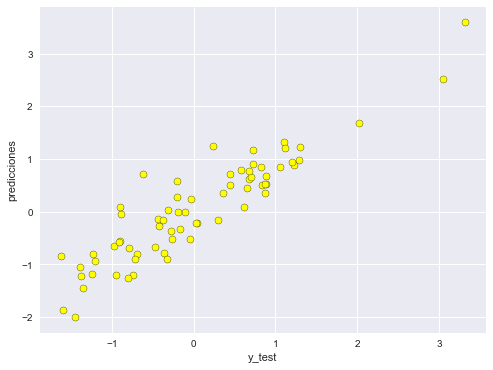

In [71]:
plt.scatter(y_test,predicciones_red2, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Gradient Boosting Trees

In [72]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 10,loss = 'ls', max_features = 'auto', random_state = 123)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=10, presort='auto',
             random_state=123, subsample=1.0, verbose=0, warm_start=False)

In [73]:
preditions = gbr.predict(X_test)

In [74]:
print('MAE:', metrics.mean_absolute_error(y_test, preditions))
print('MSE:', metrics.mean_squared_error(y_test, preditions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preditions)))

MAE: 0.4615692119745249
MSE: 0.3879400858684154
RMSE: 0.6228483650684293


In [75]:
metrics.r2_score(y_test,preditions)

0.6237209763338976

Text(0,0.5,'predicciones')

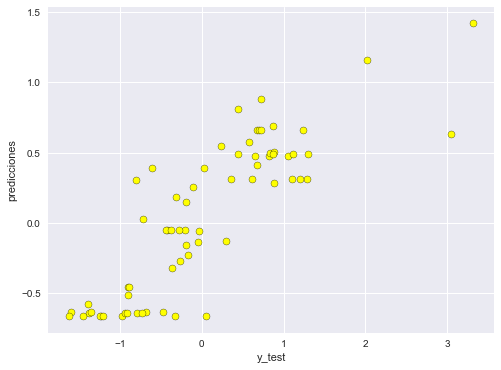

In [76]:
plt.scatter(y_test,preditions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## GridSearchCV para Gradient Boosting Trees

In [111]:
grid = {'max_features'  : ['auto', 'sqrt', 'log2'],
        'max_depth'     : [None, 1, 3, 5, 10, 20],
        'subsample'     : [0.5, 1],
        'learning_rate' : [0.001, 0.01, 0.1]}

In [112]:
red3 = GridSearchCV(GradientBoostingRegressor(), grid , cv = 5, refit= True, verbose= 3)
red3.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5, score=0.09706614005512781, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5, score=0.05173434495763429, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5, score=0.11736916097999595, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5, score=0.0013493852638880588, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=0.5, score=-0.1455479700467739, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=1, score=0.11521981554682148, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=1, score=0.09481730222709073, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=None, max_features=auto, subsample=1, score=0.10501198878589724, total=   0.0s
[CV] learning_rate=0.001, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=None,

[CV]  learning_rate=0.001, max_depth=1, max_features=sqrt, subsample=1, score=-0.23294680197601525, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5, score=0.03357875118406228, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5, score=-0.0067045636582383486, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5, score=0.03926684232005506, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5, score=-0.07453342866294577, total=   0.0s
[CV] learning_rate=0.001, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=1, max_features=log2

[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=0.5, score=-0.003656631957800638, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=0.5, score=-0.14338550987222742, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=1, score=0.12268485082252023, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=1, score=0.08585460257427924, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=1, score=0.12982285706582142, total=   0.0s
[CV] learning_rate=0.001, max_depth=5, max_features=auto, subsample=1 
[CV]  learning_rate=0.001, max_depth=5, max_features=auto, subsample=1,

[CV]  learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5, score=0.04564990944235026, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5, score=0.11247455532301232, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5, score=-0.008094496065284229, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.001, max_depth=10, max_features=log2, subsample=0.5, score=-0.15672340039802446, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.001, max_depth=10, max_features=log2, subsample=1, score=0.1100823224230818, total=   0.0s
[CV] learning_rate=0.001, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.001, max_depth=10, max_features=

[CV]  learning_rate=0.01, max_depth=None, max_features=auto, subsample=1, score=0.48908442060341806, total=   0.0s
[CV] learning_rate=0.01, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.01, max_depth=None, max_features=auto, subsample=1, score=0.2140716547908262, total=   0.0s
[CV] learning_rate=0.01, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.01, max_depth=None, max_features=auto, subsample=1, score=0.2873786792113343, total=   0.0s
[CV] learning_rate=0.01, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=None, max_features=sqrt, subsample=0.5, score=0.5559713945956137, total=   0.0s
[CV] learning_rate=0.01, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=None, max_features=sqrt, subsample=0.5, score=0.42732432449200275, total=   0.0s
[CV] learning_rate=0.01, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=None, max_feature

[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5, score=0.11841257124916983, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5, score=0.31509882541515133, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5, score=0.1868971500551464, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=0.5, score=0.04417477076856302, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, subsample=1 .
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=1, score=0.2876287458531782, total=   0.0s
[CV] learning_rate=0.01, max_depth=1, max_features=log2, subsample=1 .
[CV]  learning_rate=0.01, max_depth=1, max_features=log2, subsample=1, score

[CV]  learning_rate=0.01, max_depth=5, max_features=auto, subsample=1, score=0.4945181473231396, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=auto, subsample=1 .
[CV]  learning_rate=0.01, max_depth=5, max_features=auto, subsample=1, score=0.5621719770069376, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=auto, subsample=1 .
[CV]  learning_rate=0.01, max_depth=5, max_features=auto, subsample=1, score=0.22904163075399786, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=auto, subsample=1 .
[CV]  learning_rate=0.01, max_depth=5, max_features=auto, subsample=1, score=0.2761936115065793, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=5, max_features=sqrt, subsample=0.5, score=0.5542633357162023, total=   0.0s
[CV] learning_rate=0.01, max_depth=5, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=5, max_features=sqrt, subsample=0.5, score=0.4426

[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=0.5, score=0.4348536074183319, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=0.5, score=0.324748344074675, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=1, score=0.5564557464539823, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=1, score=0.5309136048591916, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=1, score=0.6120065818788227, total=   0.0s
[CV] learning_rate=0.01, max_depth=10, max_features=log2, subsample=1 
[CV]  learning_rate=0.01, max_depth=10, max_features=log2, subsample=1, score=0.

[CV]  learning_rate=0.1, max_depth=None, max_features=auto, subsample=1, score=-0.07375256747703962, total=   0.0s
[CV] learning_rate=0.1, max_depth=None, max_features=auto, subsample=1 
[CV]  learning_rate=0.1, max_depth=None, max_features=auto, subsample=1, score=0.03912854343004413, total=   0.0s
[CV] learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5, score=0.726450638367139, total=   0.0s
[CV] learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5, score=0.6646673740265406, total=   0.0s
[CV] learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5, score=0.6359383506644507, total=   0.0s
[CV] learning_rate=0.1, max_depth=None, max_features=sqrt, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=None, max_features=sqrt,

[CV]  learning_rate=0.1, max_depth=1, max_features=log2, subsample=1, score=0.7013929172198192, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, subsample=1, score=0.6663289775542807, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, subsample=1, score=0.6979540691174011, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, subsample=1, score=0.5502270105343465, total=   0.0s
[CV] learning_rate=0.1, max_depth=1, max_features=log2, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=1, max_features=log2, subsample=1, score=0.2781154020914791, total=   0.0s
[CV] learning_rate=0.1, max_depth=3, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=3, max_features=auto, subsample=0.5, score=0.763185749504215

[CV]  learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1, score=0.6896157332500038, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1, score=0.6842630659604206, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1, score=0.6441098300164765, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1, score=0.5531159658822133, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1 ..
[CV]  learning_rate=0.1, max_depth=5, max_features=sqrt, subsample=1, score=0.37645008147984194, total=   0.0s
[CV] learning_rate=0.1, max_depth=5, max_features=log2, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=5, max_features=log2, subsample=0.5, score=0.71769619218940

[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=0.5, score=0.7347313467431509, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=0.5, score=0.5840074493597744, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, max_features=auto, subsample=0.5 
[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=0.5, score=0.444809007901601, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, max_features=auto, subsample=1 .
[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=1, score=0.4590822382563766, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, max_features=auto, subsample=1 .
[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=1, score=0.559888096050225, total=   0.0s
[CV] learning_rate=0.1, max_depth=20, max_features=auto, subsample=1 .
[CV]  learning_rate=0.1, max_depth=20, max_features=auto, subsample=1, score=0.50631

[Parallel(n_jobs=1)]: Done 540 out of 540 | elapsed:   22.1s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 1, 3, 5, 10, 20], 'subsample': [0.5, 1], 'learning_rate': [0.001, 0.01, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [106]:
red3.best_params_

{'learning_rate': 0.1,
 'max_depth': 1,
 'max_features': 'auto',
 'subsample': 0.5}

In [107]:
predicciones_red3 = red3.predict(X_test)

In [108]:
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_red3))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_red3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_red3)))

MAE: 0.3351230210675513
MSE: 0.18657264407747978
RMSE: 0.4319405561850841


In [109]:
metrics.r2_score(y_test,predicciones_red3)

0.8190355291613522

Text(0,0.5,'predicciones')

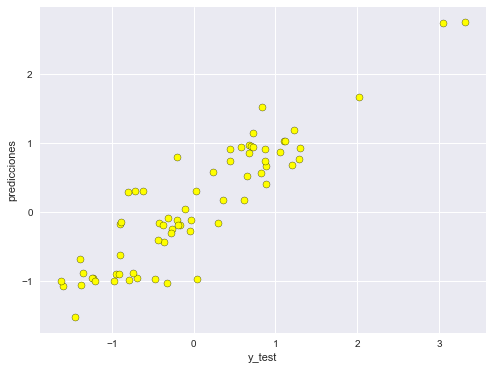

In [110]:
plt.scatter(y_test,predicciones_red3, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Decision Tree Regressor

In [84]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           presort=False, random_state=None, splitter='best')
dtr.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [85]:
preditions = dtr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, preditions))
print('MSE:', metrics.mean_squared_error(y_test, preditions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preditions)))

MAE: 0.528877220419121
MSE: 0.4367561024033378
RMSE: 0.6608752547972558


In [86]:
metrics.r2_score(y_test,preditions)

0.5763723168110987

Text(0,0.5,'predicciones')

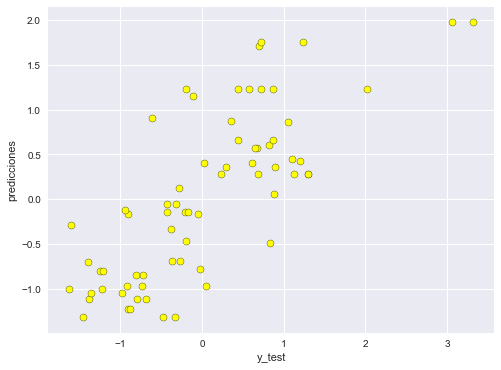

In [87]:
plt.scatter(y_test,preditions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Bagging Regressor

In [116]:
from sklearn.ensemble import BaggingRegressor
br  = BaggingRegressor(base_estimator=red,bootstrap=True,bootstrap_features=False,
                      max_features=1.0, max_samples=1.0, n_estimators=10, n_jobs=1,
                      oob_score=False, random_state=None, verbose=0, warm_start=False)
br.fit(X_train, y_train)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.6506802532176534, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.6985558867219146, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.8260625411010474, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.6980874099930237, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7466863119020064, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha=0.1, tol=0.01, score=0.6505135673515405, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV] .. alpha=0.01, tol=1e-05, score=0.8669102597146761, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.9042921623442346, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8719146627849398, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.7586543806031669, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.7448468631443008, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.8669241670225158, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.9043020685504505, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV] .. alpha=0.001, tol=0.001, score=0.855226997274738, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8675112261402746, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8902838404117864, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8295505355212757, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.7231983406052144, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8555447785976935, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8675112261402746, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.005, tol=1e-05, score=0.8253512837373267, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.7719348858581548, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8751678152211472, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.9088932324302633, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8884799994685806, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.8253512837373267, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.7719348858581548, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV]  alpha=0.0001, tol=1e-05, score=0.8415404854181074, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV] . alpha=0.0001, tol=1e-05, score=0.848805872973178, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8807493419956536, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8085405830536615, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV] . alpha=0.0001, tol=1e-06, score=0.693769450618849, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8415404854181074, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV] . alpha=0.0001, tol=1e-06, score=0.848805872973178, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0005, tol=1e-06, score=0.8501684282836864, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV] . alpha=0.0005, tol=1e-06, score=0.858814911073323, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8864396936284189, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8175801435433515, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.7061483413057549, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8501684282836864, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV] . alpha=0.0005, tol=1e-07, score=0.858814911073323, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  

[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8686138705982747, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.7369550198704582, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8492803872170457, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8309764720239505, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7942292490262284, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] ... alpha=0.01, tol=1e-05, score=0.868676080079646, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7370810932480539, total=   0.0s
[CV] a

[CV] . alpha=0.001, tol=0.001, score=0.7848741816250295, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.9163450836230475, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.7959506961253733, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8612363907301964, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8141272315845243, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.7830350437877932, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.9163450836230475, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.005, tol=1e-06, score=0.8440724146397713, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.8424067230415084, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.7994819590169444, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.8985458857227053, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.7894936702900609, total=   0.0s
[CV] alpha=0.005, tol=1e-07 ..........................................
[CV] . alpha=0.005, tol=1e-07, score=0.8440720111367437, total=   0.0s
[CV] alpha=0.005, tol=1e-07 ..........................................
[CV] . alpha=0.005, tol=1e-07, score=0.8424067230415084, total=   0.0s
[CV] alpha=0.005, tol=1e-07 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV]  alpha=0.0001, tol=1e-06, score=0.9026398816156571, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.7582599411372458, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8528022886946124, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.7782212658173598, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.7771148278943841, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.9026398816156571, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.7582599411372458, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remainin

[CV]  alpha=0.0005, tol=1e-07, score=0.7752691882878365, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.9112235912998715, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.7762808103968729, total=   0.0s
Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7563890011075377, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7703940076820169, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.8007991827846555, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7288035006138396, total=   0.0s
[CV] alpha=0.1,

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.001, tol=0.01, score=0.8628820195596871, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.6192131516949202, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.8325916775024774, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.9097947844471064, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.9088373593895542, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8644208973845452, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.6095201703336919, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.005, tol=0.001, score=0.8895723824942262, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] . alpha=0.005, tol=0.001, score=0.8515126438587776, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] . alpha=0.005, tol=0.001, score=0.6085844399746747, total=   0.0s
[CV] alpha=0.005, tol=0.001 ..........................................
[CV] . alpha=0.005, tol=0.001, score=0.7398512928759108, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.9043952167120687, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.8910583574064219, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.8448560735845372, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=0.001, score=0.9229306811391322, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.8468943210655544, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.6242121381516482, total=   0.0s
[CV] alpha=0.0001, tol=0.001 .........................................
[CV]  alpha=0.0001, tol=0.001, score=0.8807231367989509, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV]  alpha=0.0001, tol=0.0001, score=0.9099179912851777, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV]  alpha=0.0001, tol=0.0001, score=0.9229306811391322, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV]  alpha=0.0001, tol=0.0001, score=0.8468943210655544, total=   0.0s
[CV] alpha=0.0001, tol=0.0001 ........................................
[CV

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV]  alpha=0.0001, tol=1e-06, score=0.6242121381516482, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8807231367989509, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.9099179912851777, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.9229306811391322, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8468943210655544, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.6242121381516482, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8807231367989509, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.0005, tol=1e-06, score=0.613227791832184, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8712943667447408, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.9104002571118736, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.9178493282356773, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8569204888369228, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV] . alpha=0.0005, tol=1e-07, score=0.613227791832184, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8712943667447408, total=   0.0s
Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] alpha=0.1,

[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


[CV] . alpha=0.01, tol=0.0001, score=0.7748420347267361, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.6476661607691246, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8727233959928726, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8254276793765244, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7883811731486199, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7748380337510714, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.6475935937664732, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.001, tol=0.001, score=0.8869196999844231, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .. alpha=0.001, tol=0.001, score=0.856574328655036, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8624243412636111, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8287536481675498, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] ... alpha=0.001, tol=0.001, score=0.90762152292697, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8869196999844231, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV] . alpha=0.001, tol=0.0001, score=0.856574328655036, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.005, tol=0.0001, score=0.7507398651512941, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.8864265264676332, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8598737268551973, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8253512489923456, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8369654723341646, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.7508548248840992, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8864265264676332, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=0.0001, score=0.9018147536261694, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8714511081686307, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8383868866221434, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8385394952102363, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8508335442200909, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.9018147536261694, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8714511081686307, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0005, tol=1e-05, score=0.8804866764781468, total=   0.0s
[CV] alpha=0.0005, tol=1e-05 .........................................
[CV] . alpha=0.0005, tol=1e-05, score=0.850187914484669, total=   0.0s
[CV] alpha=0.0005, tol=1e-05 .........................................
[CV]  alpha=0.0005, tol=1e-05, score=0.8540476322579846, total=   0.0s
[CV] alpha=0.0005, tol=1e-05 .........................................
[CV]  alpha=0.0005, tol=1e-05, score=0.8439986553560341, total=   0.0s
[CV] alpha=0.0005, tol=1e-05 .........................................
[CV]  alpha=0.0005, tol=1e-05, score=0.9059555219115704, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8804866764781468, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV] . alpha=0.0005, tol=1e-06, score=0.850187914484669, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.9s finished
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_mod


[CV] alpha=0.01, tol=0.01 ............................................
[CV] ... alpha=0.01, tol=0.01, score=0.8248475505506573, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.7125831156950257, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.8482511020691859, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.8714921199919107, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.9170703772186187, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.8090871889860178, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.7065095487689987, total=   0.0s
[CV] 

[CV] .. alpha=0.001, tol=0.01, score=0.9167299485667925, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.8885520874596733, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.9476505802684125, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.8564890805485899, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.7970521096931676, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.9153559445921698, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8926988445222298, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.005, tol=0.0001, score=0.9263360532334717, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.8368788293116356, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.7505513284125385, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8696212538724049, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8803775109981121, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.9263784446505899, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8369980155954289, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=1e-05, score=0.8519899704454167, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8563544201587626, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.9285691560376361, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8824125871255044, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.9456203215357518, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8519899704454167, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8563544201587626, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.0005, tol=1e-06, score=0.923619024033589, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8893437758594497, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV] . alpha=0.0005, tol=1e-06, score=0.948987046728027, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8553729356070814, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8228335054669433, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV] . alpha=0.0005, tol=1e-07, score=0.923619024033589, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8893437758594497, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.8s finished
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio

[CV] .. alpha=0.01, tol=0.001, score=0.7970262541006885, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8168762953459425, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8104116945976174, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8469796257644798, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.9177053486529501, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.7897770388842476, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8168531687558797, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.001, tol=0.01, score=0.7629265099548375, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.8234214183839532, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.9053216369224986, total=   0.0s
[CV] alpha=0.001, tol=0.01 ...........................................
[CV] .. alpha=0.001, tol=0.01, score=0.8432546164051822, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8293814491635519, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.7457819551819116, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8269518234301725, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.005, tol=0.0001, score=0.7905619268248121, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.8376506897988049, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.9216674999512299, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV] . alpha=0.005, tol=0.0001, score=0.818731544007228, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8081730565974993, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.7905619268248121, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8376308060411856, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=1e-05, score=0.7774050015367289, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV] . alpha=0.0001, tol=1e-05, score=0.821989603005757, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8823981009233413, total=   0.0s
[CV] alpha=0.0001, tol=1e-05 .........................................
[CV]  alpha=0.0001, tol=1e-05, score=0.8456367033279315, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.7728280664681754, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.7774050015367289, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV] . alpha=0.0001, tol=1e-06, score=0.821989603005757, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV]  alpha=0.0005, tol=1e-05, score=0.8474829407975938, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8086735303676298, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.7722908757795471, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8235744786677968, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8914305976080802, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8474829407975938, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8086735303676298, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done 245 out of 245 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iteratio


[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.8699539967300671, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] .. alpha=0.01, tol=0.0001, score=0.862867247434359, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7770421276933184, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8389607527380547, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] ... alpha=0.01, tol=1e-05, score=0.877731357038444, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8701698759035948, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8629683446124604, total=   0.0s
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.001, tol=0.01, score=0.8706819819068102, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.7981169906118843, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8502371749380764, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8950339131134362, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8586381299478136, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.8753254946786269, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.7981169906118843, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.005, tol=1e-05, score=0.8489584789460317, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8994727578903714, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8824125087644932, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8803417064832729, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.7783604956056803, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.8489541155822383, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] . alpha=0.005, tol=1e-06, score=0.8994727578903714, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=1e-06, score=0.8460165868432351, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8985510986085008, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.7951717117043079, total=   0.0s
[CV] alpha=0.0001, tol=1e-06 .........................................
[CV]  alpha=0.0001, tol=1e-06, score=0.8304683217457753, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8129021794266158, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8460165868432351, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8985510986085008, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0005, tol=1e-06, score=0.8335573079343457, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8589689323906874, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8057498292375463, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8469773614957347, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8942474220317989, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8335573079343457, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  alpha=0.0005, tol=1e-07, score=0.8589689323906874, total=   0.0s
Fitting 5 folds for each of 49 candidates, totalling 245 fits
[CV] alpha=0.1,

[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.9091312602166362, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7532832641304332, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7772105547243666, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.7766407267338142, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.8146018067029707, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.9091238563684112, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.7532389325863803, total=   0.0s
[CV] a

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.001, tol=1e-05, score=0.8684900628702987, total=   0.0s
[CV] alpha=0.001, tol=1e-05 ..........................................
[CV] . alpha=0.001, tol=1e-05, score=0.9065926771091085, total=   0.0s
[CV] alpha=0.001, tol=1e-05 ..........................................
[CV] . alpha=0.001, tol=1e-05, score=0.8123380872549189, total=   0.0s
[CV] alpha=0.001, tol=1e-05 ..........................................
[CV] . alpha=0.001, tol=1e-05, score=0.6237042725464961, total=   0.0s
[CV] alpha=0.001, tol=1e-06 ..........................................
[CV] . alpha=0.001, tol=1e-06, score=0.7912854289129427, total=   0.0s
[CV] alpha=0.001, tol=1e-06 ..........................................
[CV] . alpha=0.001, tol=1e-06, score=0.8684900628702987, total=   0.0s
[CV] alpha=0.001, tol=1e-06 ..........................................
[CV] . alpha=0.001, tol=1e-06, score=0.9065926771091085, total=   0.0s
[CV] alpha=0.001, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV] . alpha=0.005, tol=1e-07, score=0.7869884958245199, total=   0.0s
[CV] alpha=0.0001, tol=0.1 ...........................................
[CV] .. alpha=0.0001, tol=0.1, score=0.7001004780684068, total=   0.0s
[CV] alpha=0.0001, tol=0.1 ...........................................
[CV] .. alpha=0.0001, tol=0.1, score=0.6307619423016142, total=   0.0s
[CV] alpha=0.0001, tol=0.1 ...........................................
[CV] .. alpha=0.0001, tol=0.1, score=0.8861112326182726, total=   0.0s
[CV] alpha=0.0001, tol=0.1 ...........................................
[CV] ... alpha=0.0001, tol=0.1, score=0.611251431516869, total=   0.0s
[CV] alpha=0.0001, tol=0.1 ...........................................
[CV] .. alpha=0.0001, tol=0.1, score=0.7034844575476633, total=   0.0s
[CV] alpha=0.0001, tol=0.01 ..........................................
[CV] . alpha=0.0001, tol=0.01, score=0.8053761842899138, total=   0.0s
[CV] alpha=0.0001, tol=0.01 ..........................................
[CV] 

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.0005, tol=0.1, score=0.7022256339132495, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.6335776356555066, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.8861986339795392, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] ... alpha=0.0005, tol=0.1, score=0.610863211506459, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.7036960517305622, total=   0.0s
[CV] alpha=0.0005, tol=0.01 ..........................................
[CV] . alpha=0.0005, tol=0.01, score=0.8006322134564288, total=   0.0s
[CV] alpha=0.0005, tol=0.01 ..........................................
[CV] . alpha=0.0005, tol=0.01, score=0.8681954519506777, total=   0.0s
[CV] alpha=0.0005, tol=0.01 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] ..... alpha=0.1, tol=0.1, score=0.7560619240113137, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.5091889479384003, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.7879684520320361, total=   0.0s
[CV] alpha=0.1, tol=0.1 ..............................................
[CV] ..... alpha=0.1, tol=0.1, score=0.6253617824587611, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha=0.1, tol=0.01, score=0.7140395067234442, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha=0.1, tol=0.01, score=0.6957335998604262, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .... alpha=0.1, tol=0.01, score=0.5065750219326834, total=   0.0s
[CV] alpha=0.1, tol=0.01 .............................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] .. alpha=0.01, tol=1e-05, score=0.8144965839716038, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.7853274598570851, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] ... alpha=0.01, tol=1e-05, score=0.845318188438809, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.8153370992677609, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .. alpha=0.01, tol=1e-05, score=0.5872037785013179, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.8144965839716038, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .. alpha=0.01, tol=1e-06, score=0.7853050563081375, total=   0.0s
[CV] alpha=0.01, tol=1e-06 ...........................................
[CV] .

[CV] .. alpha=0.001, tol=0.001, score=0.884525927748854, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.6906972411774672, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.6400731480377042, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8294107105210122, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.8598174051509682, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV] .. alpha=0.001, tol=0.0001, score=0.88459225211393, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.6947951938688949, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.005, tol=0.0001, score=0.7799155888516021, total=   0.0s
[CV] alpha=0.005, tol=0.0001 .........................................
[CV]  alpha=0.005, tol=0.0001, score=0.6257375862261347, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8626371328409661, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8449924682598208, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.8757121579983571, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.7799155888516021, total=   0.0s
[CV] alpha=0.005, tol=1e-05 ..........................................
[CV] . alpha=0.005, tol=1e-05, score=0.6257375862261347, total=   0.0s
[CV] alpha=0.005, tol=1e-06 ..........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0005, tol=1e-05, score=0.6672314824389984, total=   0.0s
[CV] alpha=0.0005, tol=1e-05 .........................................
[CV]  alpha=0.0005, tol=1e-05, score=0.6392727605695029, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.7974035414062381, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV] . alpha=0.0005, tol=1e-06, score=0.863307925470274, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.8882323511373323, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.6672314824389984, total=   0.0s
[CV] alpha=0.0005, tol=1e-06 .........................................
[CV]  alpha=0.0005, tol=1e-06, score=0.6392727605695029, total=   0.0s
[CV] alpha=0.0005, tol=1e-07 .........................................
[CV]  

[CV] .. alpha=0.01, tol=0.001, score=0.8886351326413712, total=   0.0s
[CV] alpha=0.01, tol=0.001 ...........................................
[CV] .. alpha=0.01, tol=0.001, score=0.7274006081704186, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] .. alpha=0.01, tol=0.0001, score=0.820772805395245, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.9687240428638904, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.7163607828445423, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] .. alpha=0.01, tol=0.0001, score=0.887999424350169, total=   0.0s
[CV] alpha=0.01, tol=0.0001 ..........................................
[CV] . alpha=0.01, tol=0.0001, score=0.7270785916511099, total=   0.0s
[CV] alpha=0.01, tol=1e-05 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV] . alpha=0.001, tol=0.001, score=0.9485042716907941, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] . alpha=0.001, tol=0.001, score=0.7459337170268654, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .. alpha=0.001, tol=0.001, score=0.844818043665795, total=   0.0s
[CV] alpha=0.001, tol=0.001 ..........................................
[CV] .. alpha=0.001, tol=0.001, score=0.774088239124814, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.7774208739681306, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  alpha=0.001, tol=0.0001, score=0.9485042716907941, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV] . alpha=0.001, tol=0.0001, score=0.756554159307948, total=   0.0s
[CV] alpha=0.001, tol=0.0001 .........................................
[CV]  

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  alpha=0.0001, tol=1e-07, score=0.9402322684524556, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV] . alpha=0.0001, tol=1e-07, score=0.712428136760775, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.8058745270558498, total=   0.0s
[CV] alpha=0.0001, tol=1e-07 .........................................
[CV]  alpha=0.0001, tol=1e-07, score=0.7559315670326575, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.7548165144557624, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.9241654204111398, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .. alpha=0.0005, tol=0.1, score=0.5785882933396305, total=   0.0s
[CV] alpha=0.0005, tol=0.1 ...........................................
[CV] .

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

BaggingRegressor(base_estimator=GridSearchCV(cv=5, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_...     pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [117]:
preditions = br.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, preditions))
print('MSE:', metrics.mean_squared_error(y_test, preditions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, preditions)))

MAE: 0.3104257580140591
MSE: 0.1712843854977177
RMSE: 0.4138651779235814


In [118]:
metrics.r2_score(y_test,preditions)

0.8338642391129685

Text(0,0.5,'predicciones')

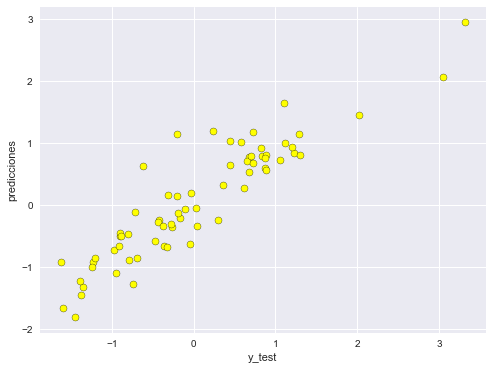

In [119]:
plt.scatter(y_test,preditions, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')

## Grid SearchCV Bagging Regressor

In [120]:
grid={'max_samples': [0.05, 0.1, 0.2, 0.5], # for bootstrap sampling
    'max_features': [0.3,0.5,0.7,0.9]
     } 

In [121]:
red5=GridSearchCV( BaggingRegressor(base_estimator=lasso,oob_score=False), grid , cv = 5, refit= True, verbose= 3)
red5.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] max_features=0.3, max_samples=0.05 ..............................
[CV]  max_features=0.3, max_samples=0.05, score=-0.2850599945655736, total=   0.0s
[CV] max_features=0.3, max_samples=0.05 ..............................
[CV]  max_features=0.3, max_samples=0.05, score=-2.434604226645161, total=   0.0s
[CV] max_features=0.3, max_samples=0.05 ..............................
[CV]  max_features=0.3, max_samples=0.05, score=0.49008793687967844, total=   0.0s
[CV] max_features=0.3, max_samples=0.05 ..............................
[CV]  max_features=0.3, max_samples=0.05, score=-0.4323616118174254, total=   0.0s
[CV] max_features=0.3, max_samples=0.05 ..............................
[CV]  max_features=0.3, max_samples=0.05, score=-6.7542515846042415, total=   0.0s
[CV] max_features=0.3, max_samples=0.1 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.3, max_samples=0.1, score=0.46689726938773435, total=   0.0s
[CV] max_features=0.3, max_samples=0.1 ...............................
[CV]  max_features=0.3, max_samples=0.1, score=0.21713899506895995, total=   0.0s
[CV] max_features=0.3, max_samples=0.1 ...............................
[CV]  max_features=0.3, max_samples=0.1, score=0.5218097943946006, total=   0.0s
[CV] max_features=0.3, max_samples=0.1 ...............................
[CV]  max_features=0.3, max_samples=0.1, score=-0.20372585884370942, total=   0.0s
[CV] max_features=0.3, max_samples=0.1 ...............................
[CV]  max_features=0.3, max_samples=0.1, score=0.22931186929391667, total=   0.0s
[CV] max_features=0.3, max_samples=0.2 ...............................
[CV]  max_features=0.3, max_samples=0.2, score=0.7288430039415679, total=   0.0s
[CV] max_features=0.3, max_samples=0.2 ...............................
[CV]  max_features=0.3, max_samples=0.2, score=0.14271964500898215, total=   0.0s
[

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.3, max_samples=0.2, score=0.541425893290362, total=   0.0s
[CV] max_features=0.3, max_samples=0.2 ...............................
[CV]  max_features=0.3, max_samples=0.2, score=0.3288142756607973, total=   0.0s
[CV] max_features=0.3, max_samples=0.5 ...............................
[CV]  max_features=0.3, max_samples=0.5, score=0.697406783790967, total=   0.0s
[CV] max_features=0.3, max_samples=0.5 ...............................
[CV]  max_features=0.3, max_samples=0.5, score=0.31496582700949183, total=   0.0s
[CV] max_features=0.3, max_samples=0.5 ...............................
[CV]  max_features=0.3, max_samples=0.5, score=0.657519795490389, total=   0.0s
[CV] max_features=0.3, max_samples=0.5 ...............................
[CV]  max_features=0.3, max_samples=0.5, score=0.5700114683617548, total=   0.0s
[CV] max_features=0.3, max_samples=0.5 ...............................
[CV]  max_features=0.3, max_samples=0.5, score=0.11452389628307946, total=   0.0s
[CV] max

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co


[CV] max_features=0.5, max_samples=0.05 ..............................
[CV]  max_features=0.5, max_samples=0.05, score=-0.1526318342060058, total=   0.0s
[CV] max_features=0.5, max_samples=0.05 ..............................
[CV]  max_features=0.5, max_samples=0.05, score=0.07063499576864285, total=   0.0s
[CV] max_features=0.5, max_samples=0.05 ..............................
[CV]  max_features=0.5, max_samples=0.05, score=-0.06676903286097335, total=   0.0s
[CV] max_features=0.5, max_samples=0.05 ..............................
[CV]  max_features=0.5, max_samples=0.05, score=-1.6640880370927107, total=   0.0s
[CV] max_features=0.5, max_samples=0.1 ...............................
[CV]  max_features=0.5, max_samples=0.1, score=0.7567328514991452, total=   0.0s
[CV] max_features=0.5, max_samples=0.1 ...............................
[CV]  max_features=0.5, max_samples=0.1, score=0.5107145994735945, total=   0.0s
[CV] max_features=0.5, max_samples=0.1 ...............................
[CV]  m

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.5, max_samples=0.1, score=-0.5392473178270509, total=   0.0s
[CV] max_features=0.5, max_samples=0.1 ...............................
[CV]  max_features=0.5, max_samples=0.1, score=0.5620267465275034, total=   0.0s
[CV] max_features=0.5, max_samples=0.2 ...............................
[CV]  max_features=0.5, max_samples=0.2, score=0.6246772080688805, total=   0.0s
[CV] max_features=0.5, max_samples=0.2 ...............................
[CV]  max_features=0.5, max_samples=0.2, score=-0.06431357461428, total=   0.0s
[CV] max_features=0.5, max_samples=0.2 ...............................
[CV]  max_features=0.5, max_samples=0.2, score=0.519667692888578, total=   0.0s
[CV] max_features=0.5, max_samples=0.2 ...............................
[CV]  max_features=0.5, max_samples=0.2, score=0.6863336485410707, total=   0.0s
[CV] max_features=0.5, max_samples=0.2 ...............................
[CV]  max_features=0.5, max_samples=0.2, score=-0.10159143184035657, total=   0.0s
[CV] m

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.5, max_samples=0.5, score=0.795705283425512, total=   0.0s
[CV] max_features=0.5, max_samples=0.5 ...............................
[CV]  max_features=0.5, max_samples=0.5, score=0.6350898815431024, total=   0.0s
[CV] max_features=0.5, max_samples=0.5 ...............................
[CV]  max_features=0.5, max_samples=0.5, score=0.5641023780783122, total=   0.0s
[CV] max_features=0.5, max_samples=0.5 ...............................
[CV]  max_features=0.5, max_samples=0.5, score=0.6299764088551032, total=   0.0s
[CV] max_features=0.5, max_samples=0.5 ...............................
[CV]  max_features=0.5, max_samples=0.5, score=0.44021880400287006, total=   0.0s
[CV] max_features=0.7, max_samples=0.05 ..............................
[CV]  max_features=0.7, max_samples=0.05, score=-1.628865271177626, total=   0.0s
[CV] max_features=0.7, max_samples=0.05 ..............................
[CV]  max_features=0.7, max_samples=0.05, score=0.20270018800347278, total=   0.0s
[CV]

C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.7, max_samples=0.05, score=0.5153301373548993, total=   0.0s
[CV] max_features=0.7, max_samples=0.05 ..............................
[CV]  max_features=0.7, max_samples=0.05, score=0.33764089465643066, total=   0.0s
[CV] max_features=0.7, max_samples=0.05 ..............................
[CV]  max_features=0.7, max_samples=0.05, score=-0.5568594697835862, total=   0.0s
[CV] max_features=0.7, max_samples=0.1 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.7, max_samples=0.1, score=0.5713803852591506, total=   0.0s
[CV] max_features=0.7, max_samples=0.1 ...............................
[CV]  max_features=0.7, max_samples=0.1, score=0.20021371962211088, total=   0.0s
[CV] max_features=0.7, max_samples=0.1 ...............................
[CV]  max_features=0.7, max_samples=0.1, score=0.5958803751461352, total=   0.0s
[CV] max_features=0.7, max_samples=0.1 ...............................
[CV]  max_features=0.7, max_samples=0.1, score=0.22836494397783802, total=   0.0s
[CV] max_features=0.7, max_samples=0.1 ...............................
[CV]  max_features=0.7, max_samples=0.1, score=-0.1263220175397073, total=   0.0s
[CV] max_features=0.7, max_samples=0.2 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.7, max_samples=0.2, score=0.8453763326905067, total=   0.0s
[CV] max_features=0.7, max_samples=0.2 ...............................
[CV]  max_features=0.7, max_samples=0.2, score=0.4735190294690619, total=   0.0s
[CV] max_features=0.7, max_samples=0.2 ...............................
[CV]  max_features=0.7, max_samples=0.2, score=0.5729571039862245, total=   0.0s
[CV] max_features=0.7, max_samples=0.2 ...............................
[CV]  max_features=0.7, max_samples=0.2, score=-0.4286921593353592, total=   0.0s
[CV] max_features=0.7, max_samples=0.2 ...............................
[CV]  max_features=0.7, max_samples=0.2, score=0.1306603560348235, total=   0.0s
[CV] max_features=0.7, max_samples=0.5 ...............................
[CV]  max_features=0.7, max_samples=0.5, score=0.8421773671198922, total=   0.0s
[CV] max_features=0.7, max_samples=0.5 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.7, max_samples=0.5, score=0.5688117750043624, total=   0.0s
[CV] max_features=0.7, max_samples=0.5 ...............................
[CV]  max_features=0.7, max_samples=0.5, score=0.7311841622687082, total=   0.0s
[CV] max_features=0.7, max_samples=0.5 ...............................
[CV]  max_features=0.7, max_samples=0.5, score=0.7327280217070824, total=   0.0s
[CV] max_features=0.7, max_samples=0.5 ...............................
[CV]  max_features=0.7, max_samples=0.5, score=0.4368061898097936, total=   0.0s
[CV] max_features=0.9, max_samples=0.05 ..............................
[CV]  max_features=0.9, max_samples=0.05, score=0.21989333973989353, total=   0.0s
[CV] max_features=0.9, max_samples=0.05 ..............................
[CV]  max_features=0.9, max_samples=0.05, score=0.035474093918072214, total=   0.0s
[CV] max_features=0.9, max_samples=0.05 ..............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.9, max_samples=0.05, score=0.41281876168655574, total=   0.0s
[CV] max_features=0.9, max_samples=0.05 ..............................
[CV]  max_features=0.9, max_samples=0.05, score=0.3763356013190267, total=   0.0s
[CV] max_features=0.9, max_samples=0.05 ..............................
[CV]  max_features=0.9, max_samples=0.05, score=-10.313621352211447, total=   0.0s
[CV] max_features=0.9, max_samples=0.1 ...............................
[CV]  max_features=0.9, max_samples=0.1, score=0.5634864796521175, total=   0.0s
[CV] max_features=0.9, max_samples=0.1 ...............................
[CV]  max_features=0.9, max_samples=0.1, score=-0.23707566040630068, total=   0.0s
[CV] max_features=0.9, max_samples=0.1 ...............................
[CV]  max_features=0.9, max_samples=0.1, score=0.5690944716592752, total=   0.0s
[CV] max_features=0.9, max_samples=0.1 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.9, max_samples=0.1, score=0.4007890126665338, total=   0.0s
[CV] max_features=0.9, max_samples=0.1 ...............................
[CV]  max_features=0.9, max_samples=0.1, score=-1.009036500344783, total=   0.0s
[CV] max_features=0.9, max_samples=0.2 ...............................
[CV]  max_features=0.9, max_samples=0.2, score=0.8058441651411471, total=   0.0s
[CV] max_features=0.9, max_samples=0.2 ...............................
[CV]  max_features=0.9, max_samples=0.2, score=0.5885478935574842, total=   0.0s
[CV] max_features=0.9, max_samples=0.2 ...............................
[CV]  max_features=0.9, max_samples=0.2, score=0.7389729979112478, total=   0.0s
[CV] max_features=0.9, max_samples=0.2 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.9, max_samples=0.2, score=0.663388159402765, total=   0.0s
[CV] max_features=0.9, max_samples=0.2 ...............................
[CV]  max_features=0.9, max_samples=0.2, score=0.5881531984666155, total=   0.0s
[CV] max_features=0.9, max_samples=0.5 ...............................
[CV]  max_features=0.9, max_samples=0.5, score=0.8307964034673109, total=   0.0s
[CV] max_features=0.9, max_samples=0.5 ...............................
[CV]  max_features=0.9, max_samples=0.5, score=0.7808363916787355, total=   0.0s
[CV] max_features=0.9, max_samples=0.5 ...............................
[CV]  max_features=0.9, max_samples=0.5, score=0.7811867362351668, total=   0.0s
[CV] max_features=0.9, max_samples=0.5 ...............................


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not co

[CV]  max_features=0.9, max_samples=0.5, score=0.6963347968046462, total=   0.0s
[CV] max_features=0.9, max_samples=0.5 ...............................
[CV]  max_features=0.9, max_samples=0.5, score=0.6696105859053285, total=   0.0s


C:\Users\LabCivil1-Pc1\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise',
       estimator=BaggingRegressor(base_estimator=Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_samples': [0.05, 0.1, 0.2, 0.5], 'max_features': [0.3, 0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [122]:
red5.best_params_

{'max_features': 0.9, 'max_samples': 0.5}

In [123]:
predicciones_red5=red5.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predicciones_red5))
print('MSE:', metrics.mean_squared_error(y_test, predicciones_red5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicciones_red5)))

MAE: 0.34746952993672314
MSE: 0.19378875511595045
RMSE: 0.44021444219374545


In [124]:
metrics.r2_score(y_test,predicciones_red5)

0.8120363266681536

Text(0,0.5,'predicciones')

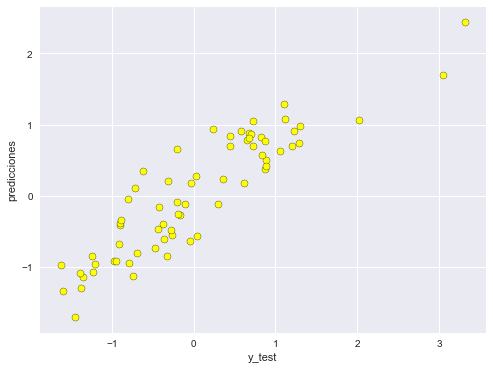

In [125]:
plt.scatter(y_test,predicciones_red5, c='yellow', marker='o',edgecolors='black')
plt.xlabel('y_test')
plt.ylabel('predicciones')